In [1]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 7.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import ImageFont
%matplotlib inline
np.random.seed(10)
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from sklearn.metrics import multilabel_confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Flatten, Input, Lambda
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,Adadelta
import warnings
import time
from keras.layers import AveragePooling2D,Rescaling
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import visualkeras
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
x_train = pd.read_csv("/content/drive/MyDrive/csvTrainImages 13440x1024.csv",header=None)
y_train = pd.read_csv("/content/drive/MyDrive/csvTrainLabel 13440x1.csv", header=None, names=["Labels"])
x_test = pd.read_csv("/content/drive/MyDrive/csvTestImages 3360x1024.csv",header=None,)
y_test = pd.read_csv("/content/drive/MyDrive/csvTestLabel 3360x1.csv", header=None, names=["Labels"])

In [5]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train

,Labels
0,1
1,1
2,1
3,1
4,1
...,...
13435,28
13436,28
13437,28
13438,28


In [7]:
print(f'x_train shape: {x_train.shape} ')
print(f'y_train shape: {x_train.shape} ')
print(f'x_test shape: {x_test.shape} ')
print(f'y_test shape: {y_test.shape} ')

x_train shape: (13440, 1024) 
y_train shape: (13440, 1024) 
x_test shape: (3360, 1024) 
y_test shape: (3360, 1) 


# **Null Values**

In [8]:
x_train.isnull()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13436,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13437,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13438,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
y_test.isnull()

,Labels
0,False
1,False
2,False
3,False
4,False
...,...
3355,False
3356,False
3357,False
3358,False


# **Check Duplicates**

In [10]:
#Check if we have any duplicates
print('Number of duplicates: ',x_train.duplicated().sum())

Number of duplicates:  0


In [11]:
#Check if we have any duplicates
print('Number of duplicates: ',x_test.duplicated().sum())

Number of duplicates:  0


In [12]:
arabic_letters= ["أ","ب","ت","ث","ج","ح","خ","د","ذ","ر","ز","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ك","ل","م","ن","ه","و","ي"]

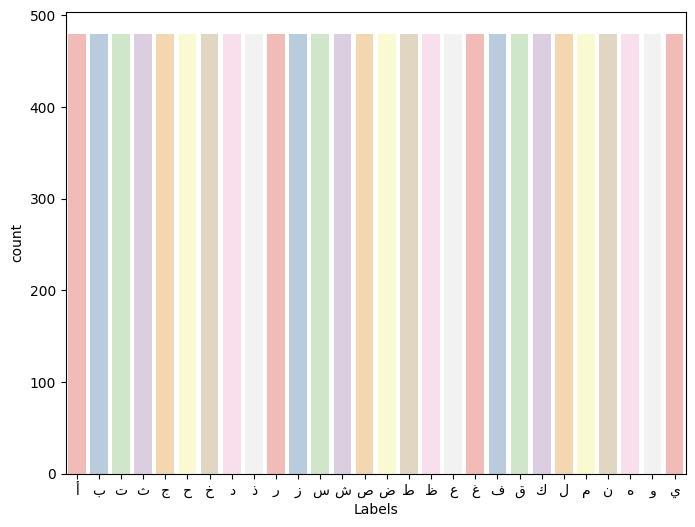

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
g = sns.countplot(data=y_train,x="Labels",palette = 'Pastel1')
g.set_xticklabels(arabic_letters);

# **Reshape**

In [14]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#-1 for 13440, 32 for width, 32 for height, 1 for grayscale
x_train = x_train.values.reshape(-1,32,32,1)
x_test = x_test.values.reshape(-1,32,32,1)

In [16]:
x_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [17]:
x_train.shape

(13440, 32, 32, 1)

# **Visualize**

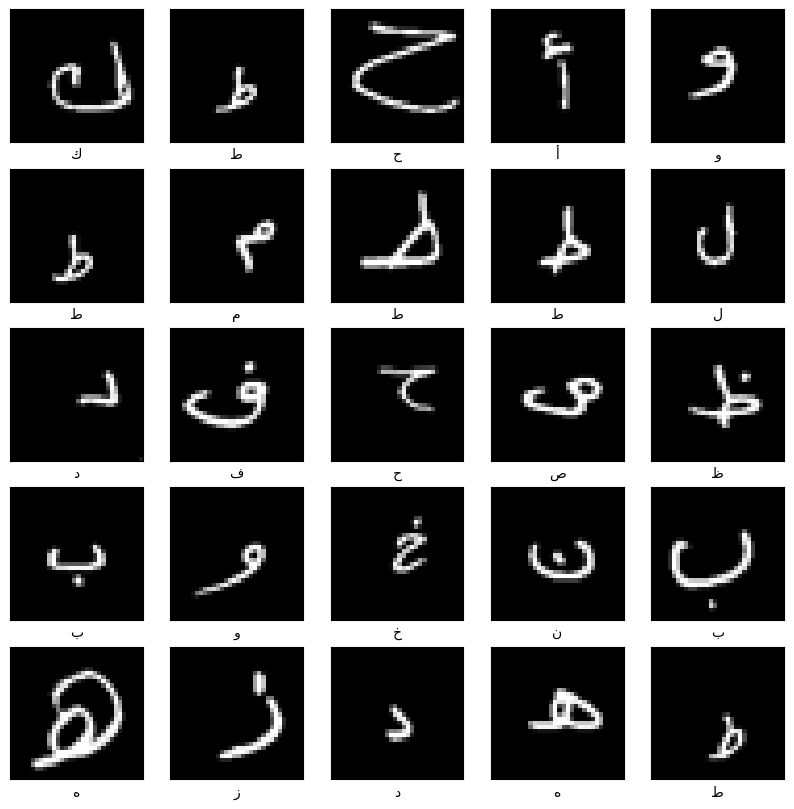

In [18]:
RANDOM_LIST = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10, 10))
for i in range(25):  # Start the loop from 0
    plt.subplot(5, 5, i + 1)  # Adjust the subplot index
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[RANDOM_LIST[i]].reshape(32, 32).T, cmap="gray")  # Specify cmap for grayscale
    plt.xlabel(arabic_letters[int(y_train['Labels'][RANDOM_LIST[i]]) - 1])

plt.show()


# **Modeling**

**Important for sparse cross entropy use**

In [19]:
y_train = y_train - 1
y_test = y_test - 1

**Learning rate annealer and early stopping**

In [20]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
epochs = 80

# **LeNet - 5**

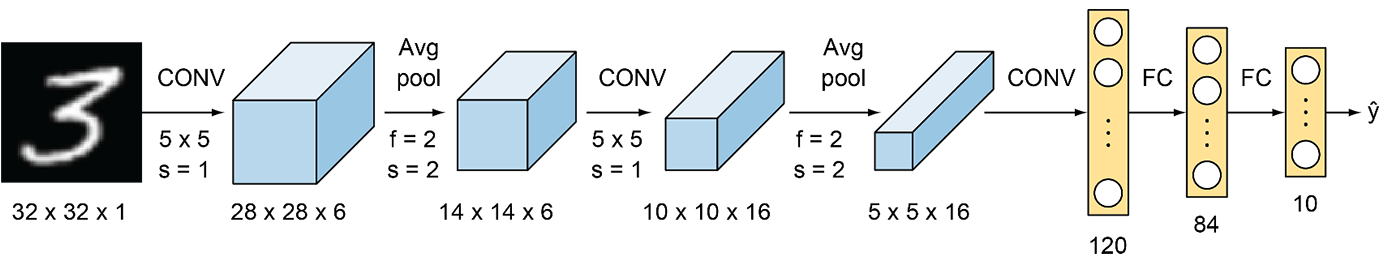

In [21]:
from tensorflow.keras.models import model_from_json

# Load the model architecture from a JSON file
with open('/content/drive/MyDrive/LeNet-5.json', 'r') as json_file:
    model = json_file.read()

# Create a new model from the loaded architecture
model = model_from_json(model)

In [22]:
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

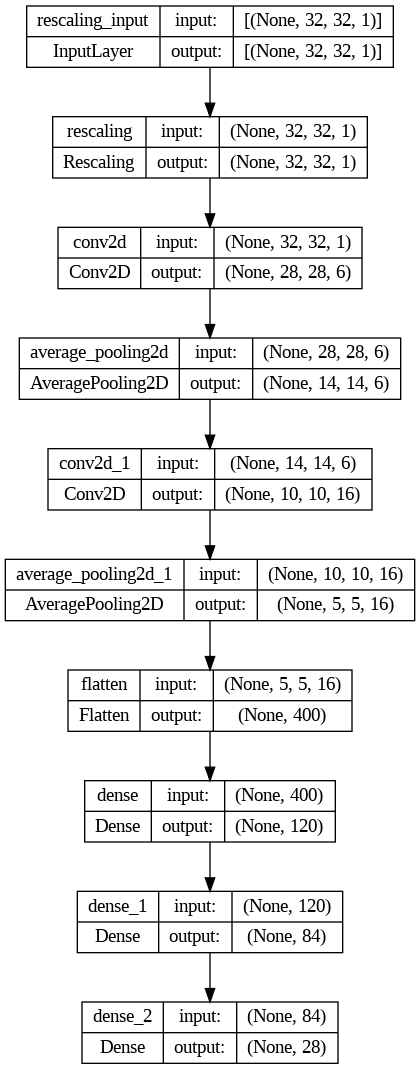

In [23]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

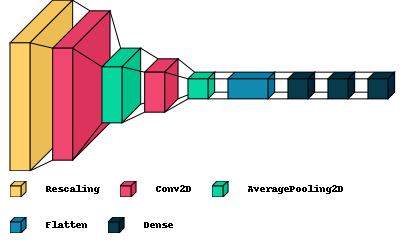

In [24]:
font = ImageFont.load_default()
image = visualkeras.layered_view(model, legend=True, font=font,draw_funnel=True,spacing=20)
image

# **Batch size**

**32**

In [25]:
model_32 = Sequential.from_config(model.get_config())

In [26]:
model_32.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_32 = model_32.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=80,batch_size=32)

Epoch 1/80
420/420 [==============================] - 4s 7ms/step - loss: 2.0855 - accuracy: 0.3651 - val_loss: 1.5292 - val_accuracy: 0.5131 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 3s 6ms/step - loss: 1.2740 - accuracy: 0.5956 - val_loss: 1.0976 - val_accuracy: 0.6420 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 3s 6ms/step - loss: 0.9207 - accuracy: 0.7020 - val_loss: 0.8905 - val_accuracy: 0.7101 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 3s 6ms/step - loss: 0.7135 - accuracy: 0.7661 - val_loss: 0.6754 - val_accuracy: 0.7902 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 3s 6ms/step - loss: 0.5665 - accuracy: 0.8138 - val_loss: 0.6115 - val_accuracy: 0.8039 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 3s 6ms/step - loss: 0.4758 - accuracy: 0.8455 - val_loss: 0.5329 - val_accuracy: 0.8241 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 3s 6ms/step - lo

**64**

In [27]:
model_64 = Sequential.from_config(model.get_config())

In [28]:
model_64.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_64 = model_64.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=epochs,batch_size=64)

Epoch 1/80
210/210 [==============================] - 3s 9ms/step - loss: 2.2490 - accuracy: 0.3262 - val_loss: 1.7094 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 2/80
210/210 [==============================] - 2s 8ms/step - loss: 1.4490 - accuracy: 0.5505 - val_loss: 1.2530 - val_accuracy: 0.6039 - lr: 0.0010
Epoch 3/80
210/210 [==============================] - 2s 8ms/step - loss: 1.0916 - accuracy: 0.6584 - val_loss: 1.0337 - val_accuracy: 0.6497 - lr: 0.0010
Epoch 4/80
210/210 [==============================] - 2s 8ms/step - loss: 0.8714 - accuracy: 0.7250 - val_loss: 0.8273 - val_accuracy: 0.7310 - lr: 0.0010
Epoch 5/80
210/210 [==============================] - 2s 8ms/step - loss: 0.7216 - accuracy: 0.7718 - val_loss: 0.7220 - val_accuracy: 0.7729 - lr: 0.0010
Epoch 6/80
210/210 [==============================] - 2s 8ms/step - loss: 0.6128 - accuracy: 0.8086 - val_loss: 0.6486 - val_accuracy: 0.7881 - lr: 0.0010
Epoch 7/80
210/210 [==============================] - 2s 8ms/step - lo

**128**

In [29]:
model_128 = Sequential.from_config(model.get_config())

In [30]:
model_128.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_128 = model_128.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=epochs,batch_size=128)

Epoch 1/80
105/105 [==============================] - 3s 14ms/step - loss: 2.5265 - accuracy: 0.2609 - val_loss: 2.0010 - val_accuracy: 0.3908 - lr: 0.0010
Epoch 2/80
105/105 [==============================] - 1s 11ms/step - loss: 1.7715 - accuracy: 0.4606 - val_loss: 1.5378 - val_accuracy: 0.5277 - lr: 0.0010
Epoch 3/80
105/105 [==============================] - 1s 11ms/step - loss: 1.4016 - accuracy: 0.5658 - val_loss: 1.2695 - val_accuracy: 0.5982 - lr: 0.0010
Epoch 4/80
105/105 [==============================] - 1s 11ms/step - loss: 1.1459 - accuracy: 0.6386 - val_loss: 1.0828 - val_accuracy: 0.6565 - lr: 0.0010
Epoch 5/80
105/105 [==============================] - 1s 11ms/step - loss: 0.9620 - accuracy: 0.6970 - val_loss: 0.9184 - val_accuracy: 0.7068 - lr: 0.0010
Epoch 6/80
105/105 [==============================] - 1s 11ms/step - loss: 0.8204 - accuracy: 0.7435 - val_loss: 0.8462 - val_accuracy: 0.7146 - lr: 0.0010
Epoch 7/80
105/105 [==============================] - 1s 11ms/st

**256**

In [31]:
model_256 = Sequential.from_config(model.get_config())

In [32]:
model_256.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_256 = model_256.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=epochs,batch_size=256)

Epoch 1/80
53/53 [==============================] - 2s 23ms/step - loss: 2.7306 - accuracy: 0.2153 - val_loss: 2.2021 - val_accuracy: 0.3580 - lr: 0.0010
Epoch 2/80
53/53 [==============================] - 1s 18ms/step - loss: 2.0140 - accuracy: 0.4002 - val_loss: 1.8163 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 3/80
53/53 [==============================] - 1s 17ms/step - loss: 1.6819 - accuracy: 0.4866 - val_loss: 1.5408 - val_accuracy: 0.5310 - lr: 0.0010
Epoch 4/80
53/53 [==============================] - 1s 17ms/step - loss: 1.4264 - accuracy: 0.5582 - val_loss: 1.3197 - val_accuracy: 0.5839 - lr: 0.0010
Epoch 5/80
53/53 [==============================] - 1s 17ms/step - loss: 1.2237 - accuracy: 0.6169 - val_loss: 1.1608 - val_accuracy: 0.6262 - lr: 0.0010
Epoch 6/80
53/53 [==============================] - 1s 18ms/step - loss: 1.0691 - accuracy: 0.6672 - val_loss: 1.0564 - val_accuracy: 0.6583 - lr: 0.0010
Epoch 7/80
53/53 [==============================] - 1s 17ms/step - loss: 0.9

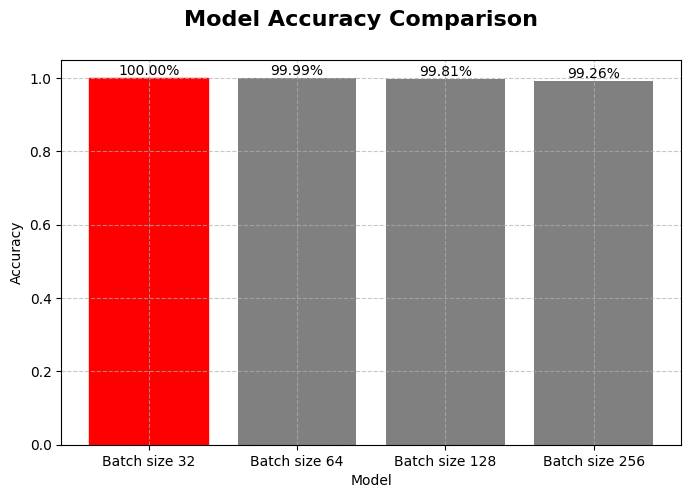

In [33]:
# Access loss and accuracy values
model_32_accuracy = history_32.history['accuracy']
model_64_accuracy = history_64.history['accuracy']
model_128_accuracy = history_128.history['accuracy']
model_256_accuracy = history_256.history['accuracy']

accuracies = [model_32_accuracy[-1], model_64_accuracy[-1], model_128_accuracy[-1], model_256_accuracy[-1]]

batch_sizes = ['Batch size 32', 'Batch size 64', 'Batch size 128', 'Batch size 256']

# Get the index of the maximum accuracy
max_accuracy_index = accuracies.index(max(accuracies))

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('white')  # Set the background color of the entire plot to white

# Create a bar chart for accuracy
bars = plt.bar(batch_sizes, accuracies, color=['gray', 'gray', 'gray', 'gray'])

# Highlight the bar with the maximum accuracy in a different color (e.g., green)
bars[max_accuracy_index].set_color('red')

# Add main title with black color
plt.suptitle('Model Accuracy Comparison', fontsize=16, fontweight='bold', color='black')

# Customize axis labels with black color
ax.set_xlabel('Model', color='black')
ax.set_ylabel('Accuracy', color='black')

# Customize tick colors with black color
ax.tick_params(axis='both', colors='black')

# Set the background color of the subplot area to white
ax.set_facecolor('white')

# Add axis lines
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# Add percentages above the bars
for bar, accuracy in zip(bars, accuracies):
    ax.text(bar.get_x() + bar.get_width() / 2, accuracy, f'{accuracy:.2%}', ha='center', va='bottom', color='black')

# Show the bar chart
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [34]:
batch_size = 32

In [35]:
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=80,batch_size=batch_size)

Epoch 1/80
420/420 [==============================] - 4s 7ms/step - loss: 2.0706 - accuracy: 0.3721 - val_loss: 1.5040 - val_accuracy: 0.5238 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 3s 6ms/step - loss: 1.2587 - accuracy: 0.6041 - val_loss: 1.0919 - val_accuracy: 0.6536 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 3s 6ms/step - loss: 0.8995 - accuracy: 0.7131 - val_loss: 0.8318 - val_accuracy: 0.7348 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 3s 6ms/step - loss: 0.7060 - accuracy: 0.7744 - val_loss: 0.6971 - val_accuracy: 0.7765 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 3s 6ms/step - loss: 0.5712 - accuracy: 0.8144 - val_loss: 0.6266 - val_accuracy: 0.8012 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 3s 6ms/step - loss: 0.4807 - accuracy: 0.8432 - val_loss: 0.5499 - val_accuracy: 0.8211 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 3s 6ms/step - lo

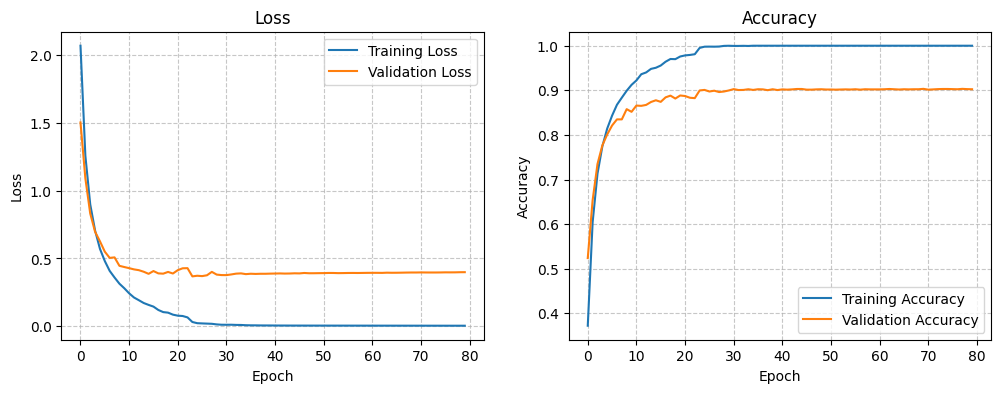

In [36]:
# Access loss and accuracy values
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plot the loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.title("Loss")
# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.title("Accuracy")

plt.show()

In [37]:
import numpy as np

# Assuming 'history' is the object returned by model.fit()

# Extract the lists of accuracy values during training and validation
accuracy = history.history['accuracy']  # Replace 'accuracy' with your metric name if different
val_accuracy = history.history['val_accuracy']  # Replace 'val_accuracy' with your validation metric name if different

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(val_accuracy) + 1  # Adding 1 because epochs are usually 1-indexed

# Extract the best training and validation accuracy
best_training_accuracy = accuracy[best_epoch - 1]  # -1 to account for 0-indexing
best_validation_accuracy = val_accuracy[best_epoch - 1]  # You can extract validation accuracy in a similar way

print(f"Best Training Accuracy: {best_training_accuracy:.4f} at Epoch {best_epoch}")
print(f"Best Validation Accuracy: {best_validation_accuracy:.4f} at Epoch {best_epoch}")

Best Training Accuracy: 1.0000 at Epoch 70
Best Validation Accuracy: 0.9033 at Epoch 70


# **Model 2**

# **Add dropout**

In [38]:
model_2 = Sequential()
model_2.add(Rescaling(scale=1.0/255.0, input_shape=(32, 32, 1)))

model_2.add(Conv2D(filters = 6, kernel_size = (5,5),strides=1, activation ='tanh'))
model_2.add(AveragePooling2D(pool_size=(2, 2), strides=2))


model_2.add(Conv2D(filters = 16, kernel_size = (5,5), activation ='tanh',strides=1))
model_2.add(AveragePooling2D(pool_size=(2,2),strides=2))


model_2.add(Flatten())

model_2.add(Dense(120, activation = "tanh"))
model_2.add(Dropout(0.25))
model_2.add(Dense(84, activation = "tanh"))
model_2.add(Dense(28, activation = "softmax"))

In [39]:
model_2.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=epochs,batch_size=32)

Epoch 1/80
420/420 [==============================] - 4s 7ms/step - loss: 2.2409 - accuracy: 0.3197 - val_loss: 1.6820 - val_accuracy: 0.4690 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 3s 6ms/step - loss: 1.5211 - accuracy: 0.5186 - val_loss: 1.1909 - val_accuracy: 0.6238 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 3s 6ms/step - loss: 1.1703 - accuracy: 0.6121 - val_loss: 0.9279 - val_accuracy: 0.7006 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 3s 7ms/step - loss: 0.9625 - accuracy: 0.6846 - val_loss: 0.7770 - val_accuracy: 0.7476 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 3s 6ms/step - loss: 0.8152 - accuracy: 0.7310 - val_loss: 0.6825 - val_accuracy: 0.7842 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 3s 6ms/step - loss: 0.7151 - accuracy: 0.7662 - val_loss: 0.6480 - val_accuracy: 0.7890 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 3s 6ms/step - lo

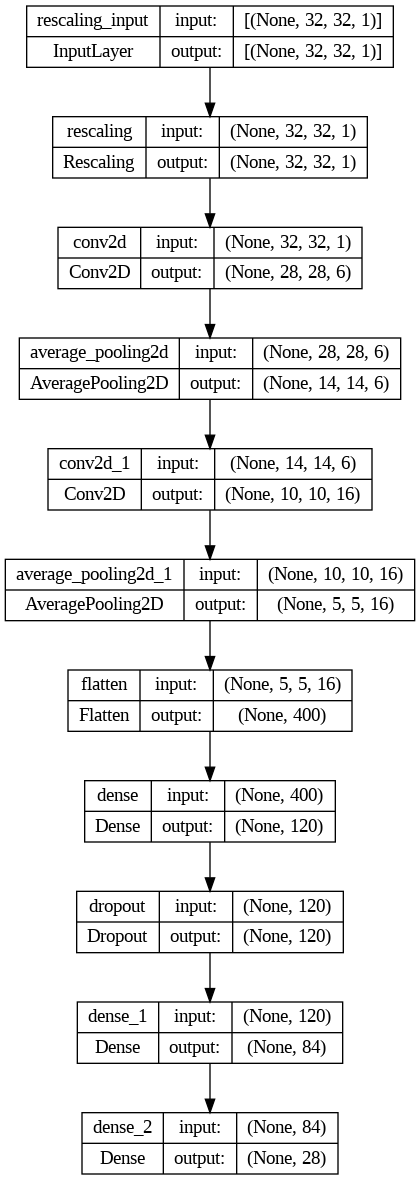

In [40]:
tf.keras.utils.plot_model(model_2, to_file='model.png', show_shapes=True, show_layer_names=True)

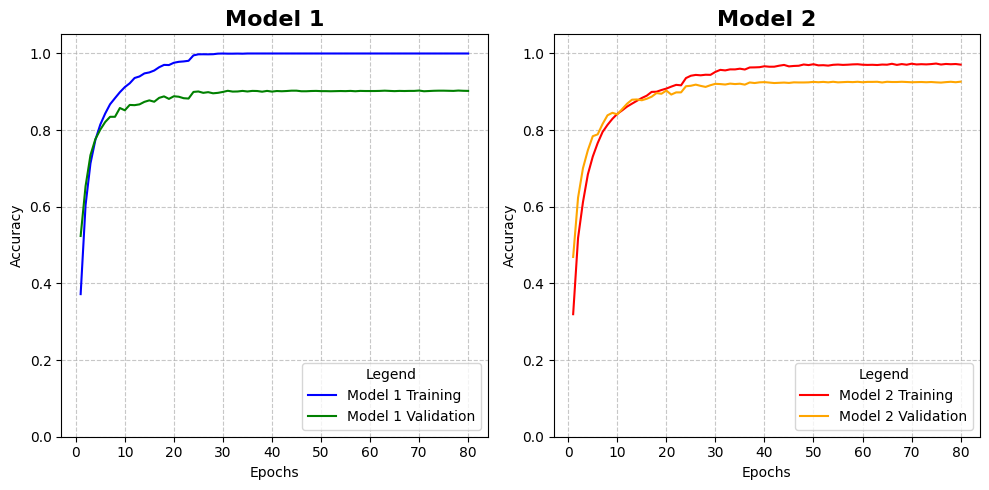

In [41]:
# Extract accuracy history for both models
model_acc = history.history['accuracy']
model_val_acc =  history.history['val_accuracy']
model_2_acc = history_2.history['accuracy']
model_2_val_acc = history_2.history['val_accuracy']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Set the background color of the entire plot to white
fig.patch.set_facecolor('white')

# Plot the accuracy and validation accuracy for the first model (subplot 1)
ax1.plot(range(1, len(model_acc) + 1), model_acc, label='Model 1 Training', color='blue')
ax1.plot(range(1, len(model_val_acc) + 1), model_val_acc, label='Model 1 Validation', color='green')

# Add a title for the first subplot
ax1.set_title('Model 1', fontsize=16, fontweight='bold', color='black')

# Set axis labels for the first subplot
ax1.set_xlabel('Epochs', color='black')
ax1.set_ylabel('Accuracy', color='black')

# Customize legend for the first subplot
legend1 = ax1.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')
for text in legend1.get_texts():
    text.set_color('black')

# Customize tick colors for the first subplot
ax1.tick_params(axis='both', colors='black')

# Set the background color of the first subplot area to white
ax1.set_facecolor('white')

# Add axis lines to the first subplot
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.set_ylim([0.0, 1.05])

# Plot the accuracy and validation accuracy for the second model (subplot 2)
ax2.plot(range(1, len(model_2_acc) + 1), model_2_acc, label=f'Model 2 Training', color='red')
ax2.plot(range(1, len(model_2_val_acc) + 1), model_2_val_acc, label=f'Model 2 Validation', color='orange')

# Add a title for the second subplot
ax2.set_title('Model 2', fontsize=16, fontweight='bold', color='black')

# Set axis labels for the second subplot
ax2.set_xlabel('Epochs', color='black')
ax2.set_ylabel('Accuracy', color='black')

# Customize legend for the second subplot
legend2 = ax2.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')
for text in legend2.get_texts():
    text.set_color('black')

# Customize tick colors for the second subplot
ax2.tick_params(axis='both', colors='black')

# Set the background color of the second subplot area to white
ax2.set_facecolor('white')

# Add axis lines to the second subplot
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.set_ylim([0.0, 1.05])
# Adjust the spacing between subplots

ax1.grid(True, linestyle='--', alpha=0.7)

# Add grid to the second subplot (ax2)
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

In [42]:
import numpy as np

# Assuming 'history' is the object returned by model.fit()

# Extract the lists of accuracy values during training and validation
accuracy = history_2.history['accuracy']  # Replace 'accuracy' with your metric name if different
val_accuracy = history_2.history['val_accuracy']  # Replace 'val_accuracy' with your validation metric name if different

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(val_accuracy) + 1  # Adding 1 because epochs are usually 1-indexed

# Extract the best training and validation accuracy
best_training_accuracy = accuracy[best_epoch - 1]  # -1 to account for 0-indexing
best_validation_accuracy = val_accuracy[best_epoch - 1]  # You can extract validation accuracy in a similar way

print(f"Best Training Accuracy: {best_training_accuracy:.4f} at Epoch {best_epoch}")
print(f"Best Validation Accuracy: {best_validation_accuracy:.4f} at Epoch {best_epoch}")

Best Training Accuracy: 0.9710 at Epoch 80
Best Validation Accuracy: 0.9265 at Epoch 80


# **Model 3**

#**Padding**

**With padding VS without padding**

In [43]:
model_with_padding = Sequential()
model_with_padding.add(Rescaling(scale=1.0/255.0, input_shape=(32, 32, 1)))

model_with_padding.add(Conv2D(filters = 6, kernel_size = (5,5),strides=1, activation ='tanh', padding = 'same'))
model_with_padding.add(AveragePooling2D(pool_size=(2, 2), strides=2))


model_with_padding.add(Conv2D(filters = 16, kernel_size = (5,5), activation ='tanh',strides=1, padding = 'same'))
model_with_padding.add(AveragePooling2D(pool_size=(2,2), strides=2))


model_with_padding.add(Flatten())

model_with_padding.add(Dense(120, activation = "tanh"))
model_with_padding.add(Dropout(0.25))
model_with_padding.add(Dense(84, activation = "tanh"))
model_with_padding.add(Dense(28, activation = "softmax"))

In [44]:
model_with_padding.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_with_padding = model_with_padding.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=80,batch_size=32)

Epoch 1/80
420/420 [==============================] - 5s 8ms/step - loss: 2.1442 - accuracy: 0.3455 - val_loss: 1.5835 - val_accuracy: 0.4991 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 3s 8ms/step - loss: 1.4411 - accuracy: 0.5356 - val_loss: 1.1226 - val_accuracy: 0.6351 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 3s 7ms/step - loss: 1.0902 - accuracy: 0.6440 - val_loss: 0.8428 - val_accuracy: 0.7253 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 3s 7ms/step - loss: 0.8656 - accuracy: 0.7170 - val_loss: 0.6924 - val_accuracy: 0.7768 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 3s 7ms/step - loss: 0.7193 - accuracy: 0.7628 - val_loss: 0.5938 - val_accuracy: 0.8122 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 3s 7ms/step - loss: 0.6321 - accuracy: 0.7915 - val_loss: 0.5390 - val_accuracy: 0.8262 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 3s 7ms/step - lo

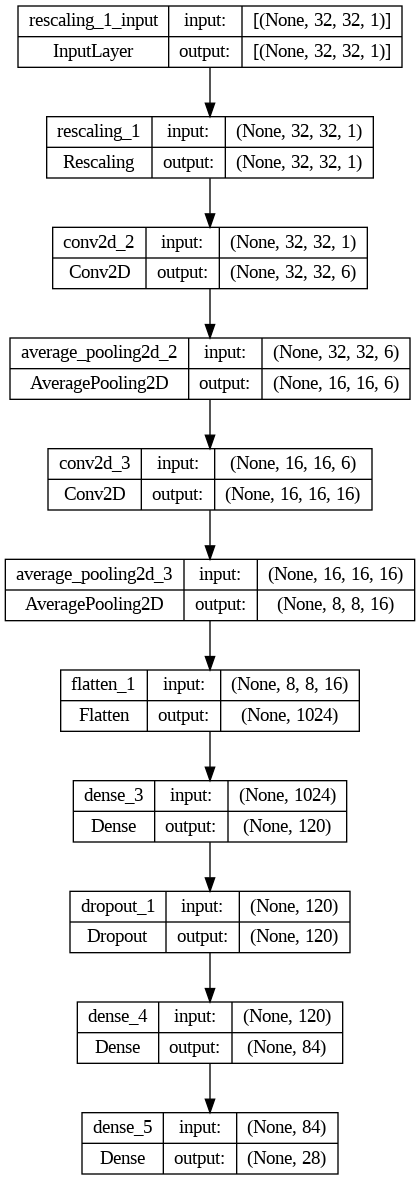

In [45]:
tf.keras.utils.plot_model(model_with_padding, to_file='model.png', show_shapes=True, show_layer_names=True)

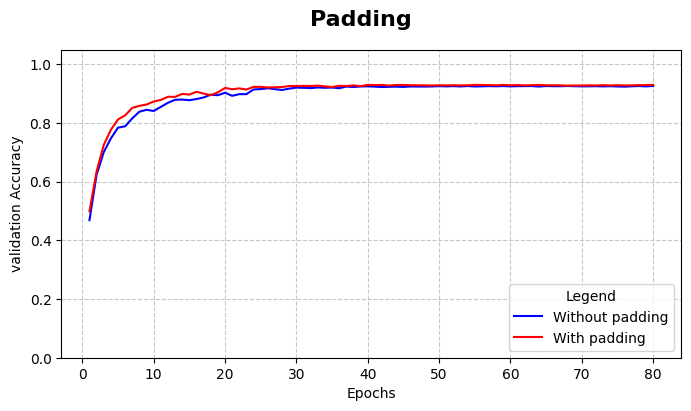

In [46]:
# Extract accuracy history for both models
model_2_acc= history_2.history['val_accuracy']
model_with_padding_acc = history_with_padding.history['val_accuracy']

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 4))
fig.patch.set_facecolor('white')  # Set the background color of the entire plot to white

# Plot the training accuracy for both models with specific line colors
ax.plot(range(1, len(model_2_acc) + 1), model_2_acc, label='Without padding', color='blue')
ax.plot(range(1, len(model_with_padding_acc) + 1), model_with_padding_acc , label='With padding', color='red')

# Add main title with black color
plt.suptitle('Padding', fontsize=16, fontweight='bold', color='black')

# Customize axis labels with black color
ax.set_xlabel('Epochs', color='black')
ax.set_ylabel('validation Accuracy', color='black')

# Customize legend with a white background and black font color
legend = ax.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')

# Set the text color in the legend to black
for text in legend.get_texts():
    text.set_color('black')

# Customize tick colors with black color
ax.tick_params(axis='both', colors='black')

# Set the background color of the subplot area to white
ax.set_facecolor('white')

# Add axis lines
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.set_ylim([0.0, 1.05])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **Max pooling VS Average pooling**

**Average pooling**

In [47]:
model_avg_pool =model_with_padding

In [48]:
model_avg_pool.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_avg_pool = model_avg_pool.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=80,batch_size=32)

Epoch 1/80
420/420 [==============================] - 5s 8ms/step - loss: 0.1552 - accuracy: 0.9458 - val_loss: 0.3051 - val_accuracy: 0.9107 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 3s 7ms/step - loss: 0.1543 - accuracy: 0.9442 - val_loss: 0.2862 - val_accuracy: 0.9185 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 3s 7ms/step - loss: 0.1500 - accuracy: 0.9493 - val_loss: 0.2789 - val_accuracy: 0.9205 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 3s 7ms/step - loss: 0.1541 - accuracy: 0.9493 - val_loss: 0.2879 - val_accuracy: 0.9164 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 3s 7ms/step - loss: 0.1429 - accuracy: 0.9497 - val_loss: 0.3029 - val_accuracy: 0.9134 - lr: 0.0010
Epoch 6/80
418/420 [============================>.] - ETA: 0s - loss: 0.1379 - accuracy: 0.9536
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
420/420 [==============================] - 3s 8ms/ste

**Max pooling**

In [49]:
model_max_pool = Sequential()
model_max_pool.add(Rescaling(scale=1.0/255.0, input_shape=(32, 32, 1)))

model_max_pool.add(Conv2D(filters = 6, kernel_size = (5,5),strides=1, activation ='tanh', padding = 'same'))
model_max_pool.add(MaxPooling2D(pool_size=(2, 2), strides=2))


model_max_pool.add(Conv2D(filters = 16, kernel_size = (5,5), activation ='tanh',strides=1, padding = 'same'))
model_max_pool.add(MaxPooling2D(pool_size=(2,2),strides=2))


model_max_pool.add(Flatten())

model_max_pool.add(Dense(120, activation = "tanh"))
model_max_pool.add(Dropout(0.25))
model_max_pool.add(Dense(84, activation = "tanh"))
model_max_pool.add(Dense(28, activation = "softmax"))

In [50]:
model_max_pool.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_max_pool = model_max_pool.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=80,batch_size=32)

Epoch 1/80
420/420 [==============================] - 5s 9ms/step - loss: 1.7391 - accuracy: 0.4778 - val_loss: 0.9652 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 4s 9ms/step - loss: 0.8009 - accuracy: 0.7433 - val_loss: 0.6388 - val_accuracy: 0.8065 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 4s 8ms/step - loss: 0.5777 - accuracy: 0.8135 - val_loss: 0.5298 - val_accuracy: 0.8280 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 4s 9ms/step - loss: 0.4593 - accuracy: 0.8550 - val_loss: 0.4428 - val_accuracy: 0.8604 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 4s 9ms/step - loss: 0.3899 - accuracy: 0.8712 - val_loss: 0.4223 - val_accuracy: 0.8613 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 4s 9ms/step - loss: 0.3207 - accuracy: 0.8983 - val_loss: 0.4014 - val_accuracy: 0.8687 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 4s 9ms/step - lo

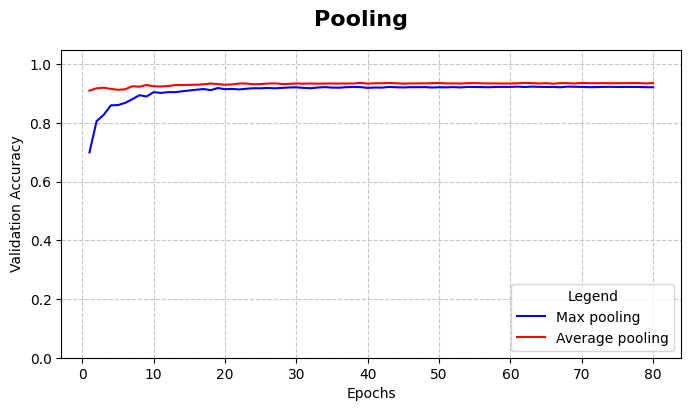

In [51]:
# Extract accuracy history for both models
model_max_pool_acc = history_max_pool.history['val_accuracy']
model_avg_pool_acc = history_avg_pool.history['val_accuracy']

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 4))
fig.patch.set_facecolor('white')  # Set the background color of the entire plot to white

# Plot the training accuracy for both models with specific line colors
ax.plot(range(1, len(model_max_pool_acc) + 1), model_max_pool_acc, label='Max pooling', color='blue')
ax.plot(range(1, len(model_avg_pool_acc) + 1), model_avg_pool_acc, label='Average pooling', color='red')

# Add main title with black color
plt.suptitle('Pooling', fontsize=16, fontweight='bold', color='black')

# Customize axis labels with black color
ax.set_xlabel('Epochs', color='black')
ax.set_ylabel('Validation Accuracy', color='black')

# Customize legend with a white background and black font color
legend = ax.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')

# Set the text color in the legend to black
for text in legend.get_texts():
    text.set_color('black')

# Customize tick colors with black color
ax.tick_params(axis='both', colors='black')

# Set the background color of the subplot area to white
ax.set_facecolor('white')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add axis lines
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.set_ylim([0.0, 1.05])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

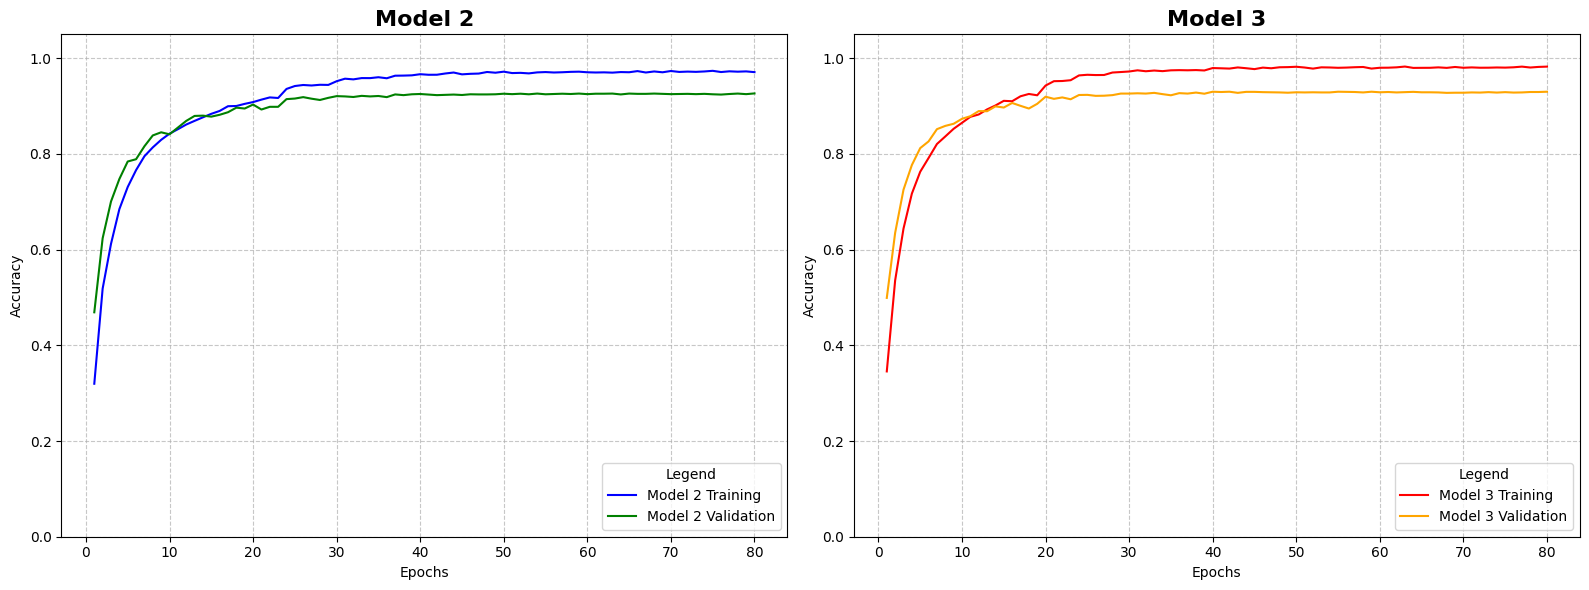

In [52]:
# Extract accuracy history for both models
model_2_acc = history_2.history['accuracy']
model_2_val_acc =  history_2.history['val_accuracy']
model_with_padding_acc = history_with_padding.history['accuracy']
model_with_padding_val_acc = history_with_padding.history['val_accuracy']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Set the background color of the entire plot to white
fig.patch.set_facecolor('white')

# Plot the accuracy and validation accuracy for the first model (subplot 1)
ax1.plot(range(1, len(model_2_acc) + 1), model_2_acc, label='Model 2 Training', color='blue')
ax1.plot(range(1, len(model_2_val_acc) + 1), model_2_val_acc, label='Model 2 Validation', color='green')

# Add a title for the first subplot
ax1.set_title('Model 2', fontsize=16, fontweight='bold', color='black')

# Set axis labels for the first subplot
ax1.set_xlabel('Epochs', color='black')
ax1.set_ylabel('Accuracy', color='black')

# Customize legend for the first subplot
legend1 = ax1.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')
for text in legend1.get_texts():
    text.set_color('black')

# Customize tick colors for the first subplot
ax1.tick_params(axis='both', colors='black')

# Set the background color of the first subplot area to white
ax1.set_facecolor('white')

# Add axis lines to the first subplot
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.set_ylim([0.0, 1.05])
# Plot the accuracy and validation accuracy for the second model (subplot 2)
ax2.plot(range(1, len(model_with_padding_acc) + 1), model_with_padding_acc , label=f'Model 3 Training', color='red')
ax2.plot(range(1, len(model_with_padding_val_acc ) + 1), model_with_padding_val_acc , label=f'Model 3 Validation', color='orange')

# Add a title for the second subplot
ax2.set_title('Model 3', fontsize=16, fontweight='bold', color='black')

# Set axis labels for the second subplot
ax2.set_xlabel('Epochs', color='black')
ax2.set_ylabel('Accuracy', color='black')

# Customize legend for the second subplot
legend2 = ax2.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')
for text in legend2.get_texts():
    text.set_color('black')

# Customize tick colors for the second subplot
ax2.tick_params(axis='both', colors='black')

# Set the background color of the second subplot area to white
ax2.set_facecolor('white')

# Add axis lines to the second subplot
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.set_ylim([0.0, 1.05])
# Adjust the spacing between subplots
ax1.grid(True, linestyle='--', alpha=0.7)

# Add grid to the second subplot (ax2)
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

In [53]:
import numpy as np

# Assuming 'history' is the object returned by model.fit()

# Extract the lists of accuracy values during training and validation
accuracy = history_with_padding.history['accuracy']  # Replace 'accuracy' with your metric name if different
val_accuracy = history_with_padding.history['val_accuracy']  # Replace 'val_accuracy' with your validation metric name if different

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(val_accuracy) + 1  # Adding 1 because epochs are usually 1-indexed

# Extract the best training and validation accuracy
best_training_accuracy = accuracy[best_epoch - 1]  # -1 to account for 0-indexing
best_validation_accuracy = val_accuracy[best_epoch - 1]  # You can extract validation accuracy in a similar way

print(f"Best Training Accuracy: {best_training_accuracy:.4f} at Epoch {best_epoch}")
print(f"Best Validation Accuracy: {best_validation_accuracy:.4f} at Epoch {best_epoch}")

Best Training Accuracy: 0.9795 at Epoch 40
Best Validation Accuracy: 0.9301 at Epoch 40


# **Model 4**

# **Increase dropout**

In [218]:
model_4 = Sequential()
model_4.add(Rescaling(scale=1.0/255.0, input_shape=(32, 32, 1)))

model_4.add(Conv2D(filters = 6, kernel_size = (5,5),strides=1, activation ='tanh', padding = 'same'))
model_4.add(AveragePooling2D(pool_size=(2, 2), strides=2))


model_4.add(Conv2D(filters = 16, kernel_size = (5,5), activation ='tanh',strides=1, padding = 'same'))
model_4.add(AveragePooling2D(pool_size=(2,2),strides=2))


model_4.add(Flatten())

model_4.add(Dense(120, activation = "tanh"))
model_4.add(Dropout(0.5))
model_4.add(Dense(84, activation = "tanh"))
model_4.add(Dense(28, activation = "softmax"))

In [219]:
start_time_without_norm = time.time()

In [220]:
start_time_without_norm

1699808709.317839

In [221]:
model_4.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_4 = model_4.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=80,batch_size=32)

Epoch 1/80
420/420 [==============================] - 5s 8ms/step - loss: 2.3201 - accuracy: 0.2959 - val_loss: 1.7441 - val_accuracy: 0.4482 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 3s 8ms/step - loss: 1.7457 - accuracy: 0.4459 - val_loss: 1.3210 - val_accuracy: 0.5893 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 3s 8ms/step - loss: 1.4121 - accuracy: 0.5458 - val_loss: 1.1532 - val_accuracy: 0.6283 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 3s 8ms/step - loss: 1.1693 - accuracy: 0.6174 - val_loss: 0.8572 - val_accuracy: 0.7193 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 3s 8ms/step - loss: 0.9976 - accuracy: 0.6731 - val_loss: 0.7283 - val_accuracy: 0.7655 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 3s 7ms/step - loss: 0.8531 - accuracy: 0.7191 - val_loss: 0.6349 - val_accuracy: 0.7908 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 3s 7ms/step - lo

In [222]:
end_time_without_norm = time.time()

# **With batch normalization VS Without batch normalization**

In [223]:
model_with_norm = Sequential()
model_with_norm.add(Rescaling(scale=1.0/255.0, input_shape=(32, 32, 1)))

model_with_norm.add(Conv2D(filters = 6, kernel_size = (5,5),strides=1, activation ='tanh',padding='same'))
model_with_norm.add(AveragePooling2D(pool_size=(2, 2), strides=2))

model_with_norm.add(Conv2D(filters = 16, kernel_size = (5,5), activation ='tanh',strides=1, padding='same'))
model_with_norm.add(BatchNormalization())
model_with_norm.add(AveragePooling2D(pool_size=(2,2), strides=2))

model_with_norm.add(Flatten())

model_with_norm.add(Dense(120, activation = "tanh"))
model_with_norm.add(BatchNormalization())
model_with_norm.add(Dropout(0.5))
model_with_norm.add(Dense(84, activation = "tanh"))
model_with_norm.add(Dense(28, activation = "softmax"))

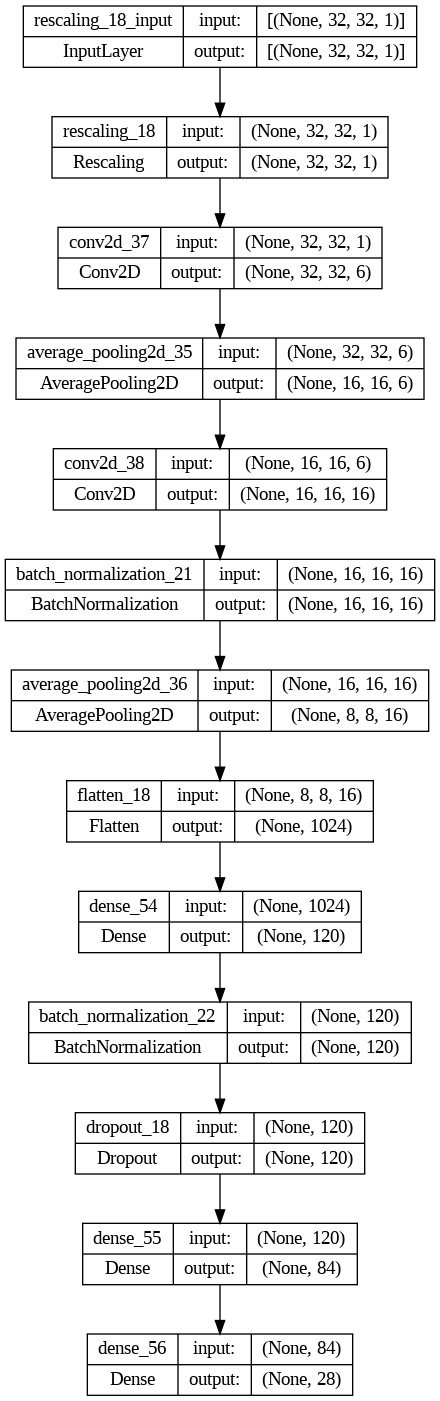

In [224]:
tf.keras.utils.plot_model(model_with_norm, to_file='model.png', show_shapes=True, show_layer_names=True)

In [225]:
start_time_with_norm = time.time()

In [226]:
model_with_norm.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_with_norm = model_with_norm.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=80,batch_size=32)

Epoch 1/80
420/420 [==============================] - 6s 11ms/step - loss: 2.3694 - accuracy: 0.2797 - val_loss: 2.5323 - val_accuracy: 0.2440 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 4s 10ms/step - loss: 1.8841 - accuracy: 0.3979 - val_loss: 2.1466 - val_accuracy: 0.3562 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 4s 10ms/step - loss: 1.6697 - accuracy: 0.4515 - val_loss: 2.9969 - val_accuracy: 0.2610 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 4s 10ms/step - loss: 1.4565 - accuracy: 0.5193 - val_loss: 2.5541 - val_accuracy: 0.3378 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 4s 10ms/step - loss: 1.2349 - accuracy: 0.5893 - val_loss: 0.8636 - val_accuracy: 0.7247 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 4s 10ms/step - loss: 1.0275 - accuracy: 0.6553 - val_loss: 0.8396 - val_accuracy: 0.7137 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 4s 9ms/ste

In [227]:
end_time_with_norm = time.time()

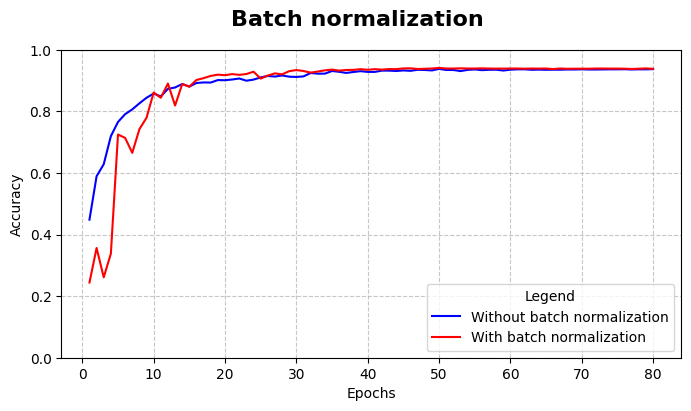

In [228]:
# Extract accuracy history for both models
model_4_acc= history_4.history['val_accuracy']
model_with_norm_acc = history_with_norm.history['val_accuracy']

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 4))
fig.patch.set_facecolor('white')  # Set the background color of the entire plot to white

# Plot the training accuracy for both models with specific line colors
ax.plot(range(1, len(model_4_acc) + 1), model_4_acc, label='Without batch normalization', color='blue')
ax.plot(range(1, len(model_with_norm_acc) + 1), model_with_norm_acc, label='With batch normalization', color='red')

# Add main title with black color
plt.suptitle('Batch normalization ', fontsize=16, fontweight='bold', color='black')

# Customize axis labels with black color
ax.set_xlabel('Epochs', color='black')
ax.set_ylabel('Accuracy', color='black')

# Customize legend with a white background and black font color
legend = ax.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')

# Set the text color in the legend to black
for text in legend.get_texts():
    text.set_color('black')

# Customize tick colors with black color
ax.tick_params(axis='both', colors='black')

# Set the background color of the subplot area to white
ax.set_facecolor('white')

# Add axis lines
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.set_ylim([0.0, 1.0])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [229]:
training_time_without_norm = end_time_without_norm - start_time_without_norm
training_time_with_norm = end_time_with_norm - start_time_with_norm
print(f'Without batch normalization: {training_time_without_norm}\nWith batch normalization: {training_time_with_norm}')

Without batch normalization: 592.4906783103943
With batch normalization: 373.1329445838928


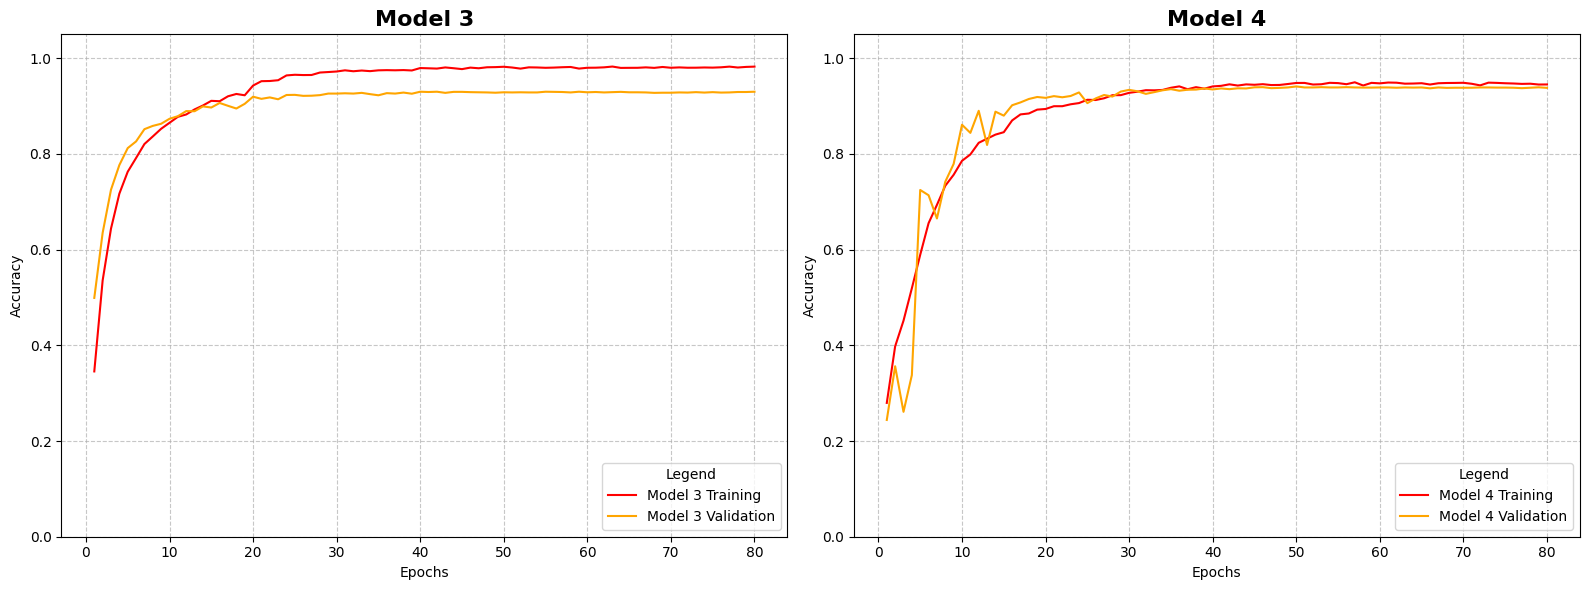

In [230]:
# Extract accuracy history for both models

model_with_norm_acc = history_with_norm.history['accuracy']
model_with_norm_val_acc = history_with_norm.history['val_accuracy']
model_with_padding_acc = history_with_padding.history['accuracy']
model_with_padding_val_acc = history_with_padding.history['val_accuracy']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Set the background color of the entire plot to white
fig.patch.set_facecolor('white')

# Plot the accuracy and validation accuracy for the first model (subplot 1)
ax1.plot(range(1, len(model_with_padding_acc) + 1), model_with_padding_acc , label=f'Model 3 Training', color='red')
ax1.plot(range(1, len(model_with_padding_val_acc ) + 1), model_with_padding_val_acc , label=f'Model 3 Validation', color='orange')


# Add a title for the first subplot
ax1.set_title('Model 3', fontsize=16, fontweight='bold', color='black')

# Set axis labels for the first subplot
ax1.set_xlabel('Epochs', color='black')
ax1.set_ylabel('Accuracy', color='black')

# Customize legend for the first subplot
legend1 = ax1.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')
for text in legend1.get_texts():
    text.set_color('black')

# Customize tick colors for the first subplot
ax1.tick_params(axis='both', colors='black')

# Set the background color of the first subplot area to white
ax1.set_facecolor('white')

# Add axis lines to the first subplot
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.set_ylim([0.0, 1.05])
# Plot the accuracy and validation accuracy for the first model (subplot 1)
ax2.plot(range(1, len(model_with_norm_acc) + 1), model_with_norm_acc , label=f'Model 4 Training', color='red')
ax2.plot(range(1, len(model_with_norm_val_acc) + 1), model_with_norm_val_acc , label=f'Model 4 Validation', color='orange')

# Add a title for the second subplot
ax2.set_title('Model 4', fontsize=16, fontweight='bold', color='black')

# Set axis labels for the second subplot
ax2.set_xlabel('Epochs', color='black')
ax2.set_ylabel('Accuracy', color='black')

# Customize legend for the second subplot
legend2 = ax2.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')
for text in legend2.get_texts():
    text.set_color('black')

# Customize tick colors for the second subplot
ax2.tick_params(axis='both', colors='black')

# Set the background color of the second subplot area to white
ax2.set_facecolor('white')

# Add axis lines to the second subplot
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.set_ylim([0.0, 1.05])
# Adjust the spacing between subplots
ax1.grid(True, linestyle='--', alpha=0.7)

# Add grid to the second subplot (ax2)
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

In [231]:
import numpy as np

# Assuming 'history' is the object returned by model.fit()

# Extract the lists of accuracy values during training and validation
accuracy = history_with_norm.history['accuracy']  # Replace 'accuracy' with your metric name if different
val_accuracy = history_with_norm.history['val_accuracy']  # Replace 'val_accuracy' with your validation metric name if different

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(val_accuracy) + 1  # Adding 1 because epochs are usually 1-indexed

# Extract the best training and validation accuracy
best_training_accuracy = accuracy[best_epoch - 1]  # -1 to account for 0-indexing
best_validation_accuracy = val_accuracy[best_epoch - 1]  # You can extract validation accuracy in a similar way

print(f"Best Training Accuracy: {best_training_accuracy:.4f} at Epoch {best_epoch}")
print(f"Best Validation Accuracy: {best_validation_accuracy:.4f} at Epoch {best_epoch}")

Best Training Accuracy: 0.9484 at Epoch 50
Best Validation Accuracy: 0.9411 at Epoch 50


# **Model 5**

# **Best activation function**

**tanh**

In [69]:
model_tanh = Sequential()
model_tanh.add(Rescaling(scale=1.0/255.0, input_shape=(32, 32, 1)))

model_tanh.add(Conv2D(filters = 6, kernel_size = (5,5),strides=1, activation ='tanh',padding='same'))
model_tanh.add(AveragePooling2D(pool_size=(2, 2), strides=2))

model_tanh.add(Conv2D(filters = 16, kernel_size = (5,5), activation ='tanh',strides=1, padding='same'))
model_tanh.add(BatchNormalization())
model_tanh.add(AveragePooling2D(pool_size=(2,2),strides=2))

model_tanh.add(Flatten())

model_tanh.add(Dense(120, activation = "tanh"))
model_tanh.add(BatchNormalization())
model_tanh.add(Dropout(0.5))
model_tanh.add(Dense(84, activation = "tanh"))
model_tanh.add(Dense(28, activation = "softmax"))

In [70]:
model_tanh.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_tanh = model_tanh.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction],epochs=80,batch_size=32)

Epoch 1/80
420/420 [==============================] - 6s 10ms/step - loss: 2.3697 - accuracy: 0.2760 - val_loss: 1.9126 - val_accuracy: 0.3991 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 4s 9ms/step - loss: 1.8567 - accuracy: 0.3987 - val_loss: 1.7663 - val_accuracy: 0.4378 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 4s 9ms/step - loss: 1.6567 - accuracy: 0.4541 - val_loss: 2.2905 - val_accuracy: 0.3399 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 4s 9ms/step - loss: 1.4659 - accuracy: 0.5091 - val_loss: 1.5985 - val_accuracy: 0.4902 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 4s 9ms/step - loss: 1.2831 - accuracy: 0.5724 - val_loss: 1.4156 - val_accuracy: 0.5321 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 4s 9ms/step - loss: 1.1287 - accuracy: 0.6133 - val_loss: 0.9869 - val_accuracy: 0.6699 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 4s 9ms/step - l

**relu**

In [71]:
model_relu = Sequential()
model_relu.add(Rescaling(scale=1.0/255.0, input_shape=(32, 32, 1)))

model_relu.add(Conv2D(filters = 6, kernel_size = (5,5),strides=1, activation ='relu',padding='same'))
model_relu.add(AveragePooling2D(pool_size=(2, 2), strides=2))

model_relu.add(Conv2D(filters = 16, kernel_size = (5,5), activation ='relu',strides=1, padding='same'))
model_relu.add(BatchNormalization())
model_relu.add(AveragePooling2D(pool_size=(2,2),strides=2))

model_relu.add(Flatten())

model_relu.add(Dense(120, activation = "relu"))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(84, activation = "relu"))
model_relu.add(Dense(28, activation = "softmax"))

In [72]:
model_relu.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_relu = model_relu.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=80,batch_size=32)

Epoch 1/80
420/420 [==============================] - 6s 10ms/step - loss: 2.0469 - accuracy: 0.3789 - val_loss: 2.3309 - val_accuracy: 0.3110 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 4s 9ms/step - loss: 0.9412 - accuracy: 0.6817 - val_loss: 0.5626 - val_accuracy: 0.8265 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 4s 9ms/step - loss: 0.6668 - accuracy: 0.7732 - val_loss: 0.4546 - val_accuracy: 0.8527 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 4s 9ms/step - loss: 0.5410 - accuracy: 0.8154 - val_loss: 0.3855 - val_accuracy: 0.8690 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 4s 9ms/step - loss: 0.4669 - accuracy: 0.8422 - val_loss: 0.4030 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 4s 9ms/step - loss: 0.4005 - accuracy: 0.8631 - val_loss: 0.2855 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 4s 9ms/step - l

**ELU**

In [73]:
model_elu = Sequential()
model_elu.add(Rescaling(scale=1.0/255.0, input_shape=(32, 32, 1)))

model_elu.add(Conv2D(filters = 6, kernel_size = (5,5),strides=1, activation ='elu',padding='same'))
model_elu.add(AveragePooling2D(pool_size=(2, 2), strides=2))

model_elu.add(Conv2D(filters = 16, kernel_size = (5,5), activation ='elu',strides=1, padding='same'))
model_elu.add(BatchNormalization())
model_elu.add(AveragePooling2D(pool_size=(2,2),strides=2))

model_elu.add(Flatten())

model_elu.add(Dense(120, activation = "elu"))
model_elu.add(BatchNormalization())
model_elu.add(Dropout(0.5))
model_elu.add(Dense(84, activation = "elu"))
model_elu.add(Dense(28, activation = "softmax"))

In [74]:
model_elu.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_elu = model_elu.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=80,batch_size=32)

Epoch 1/80
420/420 [==============================] - 6s 10ms/step - loss: 2.3538 - accuracy: 0.2999 - val_loss: 1.8343 - val_accuracy: 0.4295 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 4s 9ms/step - loss: 1.7682 - accuracy: 0.4290 - val_loss: 1.3583 - val_accuracy: 0.5580 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 4s 9ms/step - loss: 1.4737 - accuracy: 0.5134 - val_loss: 1.1061 - val_accuracy: 0.6313 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 4s 9ms/step - loss: 1.2354 - accuracy: 0.5839 - val_loss: 0.9712 - val_accuracy: 0.6601 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 4s 9ms/step - loss: 1.0979 - accuracy: 0.6283 - val_loss: 0.7393 - val_accuracy: 0.7521 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 4s 9ms/step - loss: 0.9835 - accuracy: 0.6647 - val_loss: 0.6835 - val_accuracy: 0.7753 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 4s 9ms/step - l

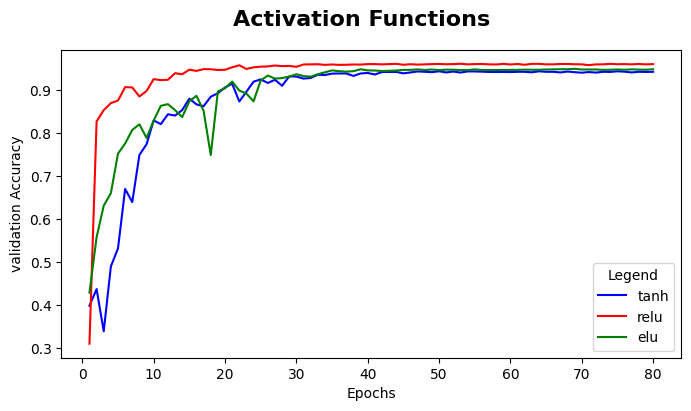

In [75]:
# Extract accuracy history for both models
model_tanh_acc = history_tanh.history['val_accuracy']
model_relu_acc = history_relu.history['val_accuracy']
model_elu_acc = history_elu.history['val_accuracy']


# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 4))
fig.patch.set_facecolor('white')  # Set the background color of the entire plot to white

# Plot the training accuracy for both models with specific line colors
ax.plot(range(1, len(model_tanh_acc) + 1),model_tanh_acc, label='tanh', color='blue')
ax.plot(range(1, len(model_relu_acc) + 1), model_relu_acc, label='relu', color='red')
ax.plot(range(1, len(model_elu_acc) + 1),model_elu_acc , label='elu', color='green')


# Add main title with black color
plt.suptitle('Activation Functions', fontsize=16, fontweight='bold', color='black')

# Customize axis labels with black color
ax.set_xlabel('Epochs', color='black')
ax.set_ylabel('validation Accuracy', color='black')

# Customize legend with a white background and black font color
legend = ax.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')

# Set the text color in the legend to black
for text in legend.get_texts():
    text.set_color('black')

# Customize tick colors with black color
ax.tick_params(axis='both', colors='black')

# Set the background color of the subplot area to white
ax.set_facecolor('white')

# Add axis lines
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.show()

# **Best Optimizer**

**adam**

In [76]:
model_adam = Sequential.from_config(model_with_norm.get_config())

In [77]:
model_adam.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_adam = model_adam.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=80,batch_size=32)

Epoch 1/80
420/420 [==============================] - 6s 10ms/step - loss: 2.3210 - accuracy: 0.2928 - val_loss: 1.7893 - val_accuracy: 0.4241 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 4s 9ms/step - loss: 1.8682 - accuracy: 0.3924 - val_loss: 1.6088 - val_accuracy: 0.4747 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 4s 9ms/step - loss: 1.6426 - accuracy: 0.4563 - val_loss: 2.4844 - val_accuracy: 0.3042 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 4s 9ms/step - loss: 1.4512 - accuracy: 0.5241 - val_loss: 1.0555 - val_accuracy: 0.6423 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 4s 9ms/step - loss: 1.2990 - accuracy: 0.5627 - val_loss: 0.9155 - val_accuracy: 0.6935 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 4s 9ms/step - loss: 1.1593 - accuracy: 0.6099 - val_loss: 0.8379 - val_accuracy: 0.7271 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 4s 9ms/step - l

**SGD**

In [78]:
model_sgd = Sequential.from_config(model_with_norm.get_config())

In [79]:
model_sgd.compile(optimizer=SGD(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_sgd = model_sgd.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=80,batch_size=32)

Epoch 1/80
420/420 [==============================] - 5s 10ms/step - loss: 3.4093 - accuracy: 0.0681 - val_loss: 2.9846 - val_accuracy: 0.1437 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 4s 9ms/step - loss: 3.0106 - accuracy: 0.1411 - val_loss: 2.6371 - val_accuracy: 0.2196 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 4s 9ms/step - loss: 2.8319 - accuracy: 0.1793 - val_loss: 2.4840 - val_accuracy: 0.2604 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 4s 9ms/step - loss: 2.7137 - accuracy: 0.1999 - val_loss: 2.3774 - val_accuracy: 0.2923 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 4s 9ms/step - loss: 2.6150 - accuracy: 0.2208 - val_loss: 2.2963 - val_accuracy: 0.3122 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 4s 9ms/step - loss: 2.5365 - accuracy: 0.2489 - val_loss: 2.2321 - val_accuracy: 0.3336 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 4s 9ms/step - l

**RMSprop**

In [80]:
model_rms = Sequential.from_config(model_with_norm.get_config())

In [81]:
model_rms.compile(optimizer=RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_rms = model_rms.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=80,batch_size=32)

Epoch 1/80
420/420 [==============================] - 6s 10ms/step - loss: 2.3018 - accuracy: 0.2964 - val_loss: 1.9073 - val_accuracy: 0.3905 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 4s 9ms/step - loss: 1.8488 - accuracy: 0.4039 - val_loss: 2.0370 - val_accuracy: 0.3491 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 4s 9ms/step - loss: 1.6264 - accuracy: 0.4680 - val_loss: 2.0001 - val_accuracy: 0.3726 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 4s 9ms/step - loss: 1.4235 - accuracy: 0.5312 - val_loss: 1.3788 - val_accuracy: 0.5524 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 4s 9ms/step - loss: 1.2585 - accuracy: 0.5847 - val_loss: 0.9679 - val_accuracy: 0.6768 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 4s 9ms/step - loss: 1.1277 - accuracy: 0.6242 - val_loss: 0.8515 - val_accuracy: 0.7289 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 4s 9ms/step - l

**Adadelta**

In [82]:
model_adadelta= Sequential.from_config(model_with_norm.get_config())

In [83]:
model_adadelta.compile(optimizer=Adadelta(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_adadelta = model_adadelta.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=80,batch_size=32)

Epoch 1/80
420/420 [==============================] - 6s 10ms/step - loss: 3.6619 - accuracy: 0.0384 - val_loss: 3.4132 - val_accuracy: 0.0470 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 4s 9ms/step - loss: 3.6230 - accuracy: 0.0415 - val_loss: 3.4669 - val_accuracy: 0.0521 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 4s 9ms/step - loss: 3.5978 - accuracy: 0.0463 - val_loss: 3.4351 - val_accuracy: 0.0568 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 4s 9ms/step - loss: 3.5676 - accuracy: 0.0497 - val_loss: 3.4004 - val_accuracy: 0.0637 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 4s 9ms/step - loss: 3.5480 - accuracy: 0.0502 - val_loss: 3.3661 - val_accuracy: 0.0699 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 4s 9ms/step - loss: 3.5155 - accuracy: 0.0533 - val_loss: 3.3333 - val_accuracy: 0.0774 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 4s 9ms/step - l

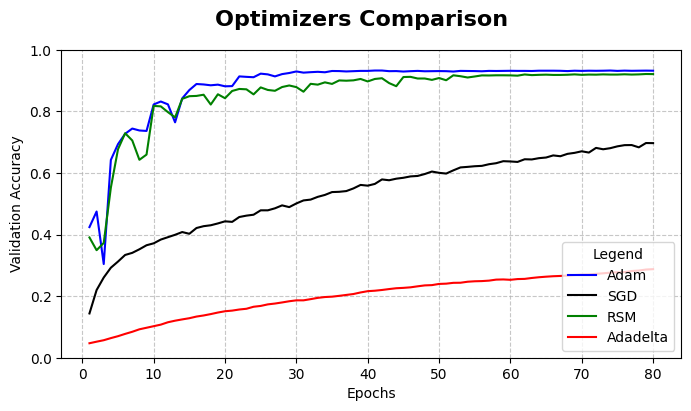

In [84]:
# Extract accuracy history for both models
model_adam_acc = history_adam.history['val_accuracy']
model_sgd_acc = history_sgd.history['val_accuracy']
model_rms_acc = history_rms .history['val_accuracy']
model_adadelta_acc = history_adadelta.history['val_accuracy']


# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 4))
fig.patch.set_facecolor('white')  # Set the background color of the entire plot to white

# Plot the training accuracy for both models with specific line colors
ax.plot(range(1, len(model_adam_acc) + 1), model_adam_acc , label='Adam', color='blue')
ax.plot(range(1, len(model_sgd_acc) + 1), model_sgd_acc, label='SGD', color='black')
ax.plot(range(1, len(model_rms_acc) + 1), model_rms_acc, label='RSM', color='green')
ax.plot(range(1, len(model_adadelta_acc) + 1), model_adadelta_acc, label='Adadelta', color='red')

# Add main title with black color
plt.suptitle('Optimizers Comparison', fontsize=16, fontweight='bold', color='black')

# Customize axis labels with black color
ax.set_xlabel('Epochs', color='black')
ax.set_ylabel('Validation Accuracy', color='black')

# Customize legend with a white background and black font color
legend = ax.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')

# Set the text color in the legend to black
for text in legend.get_texts():
    text.set_color('black')

# Customize tick colors with black color
ax.tick_params(axis='both', colors='black')

# Set the background color of the subplot area to white
ax.set_facecolor('white')

# Add axis lines
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.set_ylim([0.0, 1.0])
# Adjust the spacing between subplots
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **Add  regularizer**

In [85]:
model_regularized = Sequential()
model_regularized.add(Rescaling(scale=1.0/255.0, input_shape=(32, 32, 1)))

model_regularized.add(Conv2D(filters = 6, kernel_size = (5,5),strides=1, activation ='relu',padding='same', kernel_regularizer=l2(0.01)))
model_regularized.add(AveragePooling2D(pool_size=(2, 2), strides=2))

model_regularized.add(Conv2D(filters = 16, kernel_size = (5,5), activation ='relu',strides=1, padding='same', kernel_regularizer=l2(0.01)))
model_regularized.add(BatchNormalization())
model_regularized.add(AveragePooling2D(pool_size=(2,2),strides=2))

model_regularized.add(Flatten())

model_regularized.add(Dense(120, activation = "relu"))
model_regularized.add(BatchNormalization())
model_regularized.add(Dropout(0.5))
model_regularized.add(Dense(84, activation = "relu"))
model_regularized.add(Dense(28, activation = "softmax"))

In [86]:
model_regularized.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_regularized = model_regularized.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=80,batch_size=batch_size)

Epoch 1/80
420/420 [==============================] - 6s 9ms/step - loss: 2.1687 - accuracy: 0.3808 - val_loss: 2.8778 - val_accuracy: 0.2003 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 4s 9ms/step - loss: 1.0541 - accuracy: 0.6792 - val_loss: 0.6953 - val_accuracy: 0.7967 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 4s 9ms/step - loss: 0.7757 - accuracy: 0.7650 - val_loss: 0.6094 - val_accuracy: 0.8265 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 4s 9ms/step - loss: 0.6404 - accuracy: 0.8126 - val_loss: 0.6511 - val_accuracy: 0.8116 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 4s 9ms/step - loss: 0.5585 - accuracy: 0.8414 - val_loss: 0.5459 - val_accuracy: 0.8560 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 4s 9ms/step - loss: 0.4957 - accuracy: 0.8611 - val_loss: 0.6424 - val_accuracy: 0.8152 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 4s 9ms/step - lo

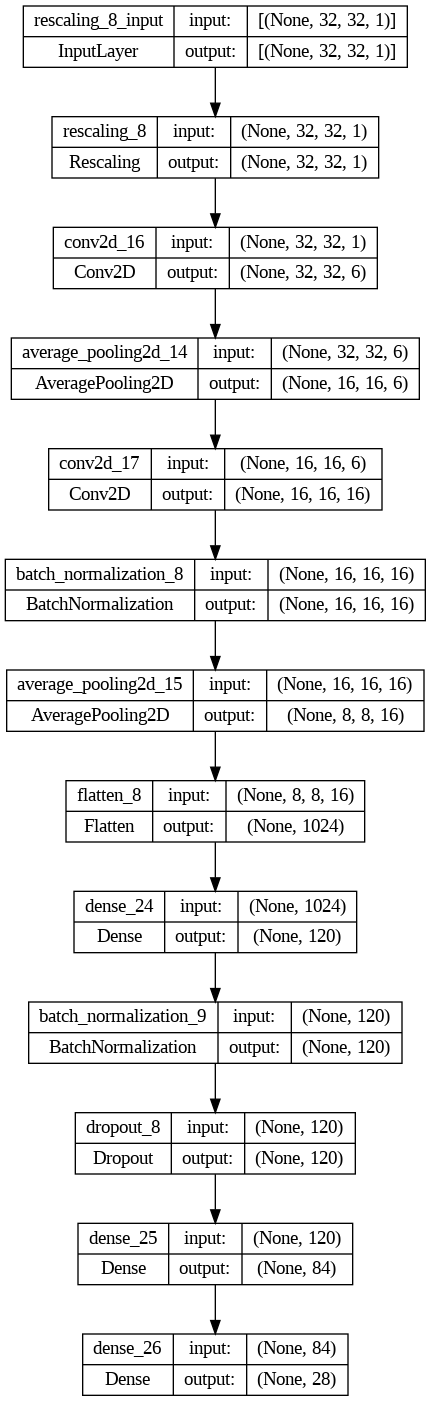

In [87]:
tf.keras.utils.plot_model(model_regularized, to_file='model.png', show_shapes=True, show_layer_names=True)

In [88]:
import numpy as np

# Assuming 'history' is the object returned by model.fit()

# Extract the lists of accuracy values during training and validation
accuracy = history_regularized.history['accuracy']  # Replace 'accuracy' with your metric name if different
val_accuracy = history_regularized.history['val_accuracy']  # Replace 'val_accuracy' with your validation metric name if different

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(val_accuracy) + 1  # Adding 1 because epochs are usually 1-indexed

# Extract the best training and validation accuracy
best_training_accuracy = accuracy[best_epoch - 1]  # -1 to account for 0-indexing
best_validation_accuracy = val_accuracy[best_epoch - 1]  # You can extract validation accuracy in a similar way

print(f"Best Training Accuracy: {best_training_accuracy:.4f} at Epoch {best_epoch}")
print(f"Best Validation Accuracy: {best_validation_accuracy:.4f} at Epoch {best_epoch}")

Best Training Accuracy: 0.9781 at Epoch 43
Best Validation Accuracy: 0.9571 at Epoch 43


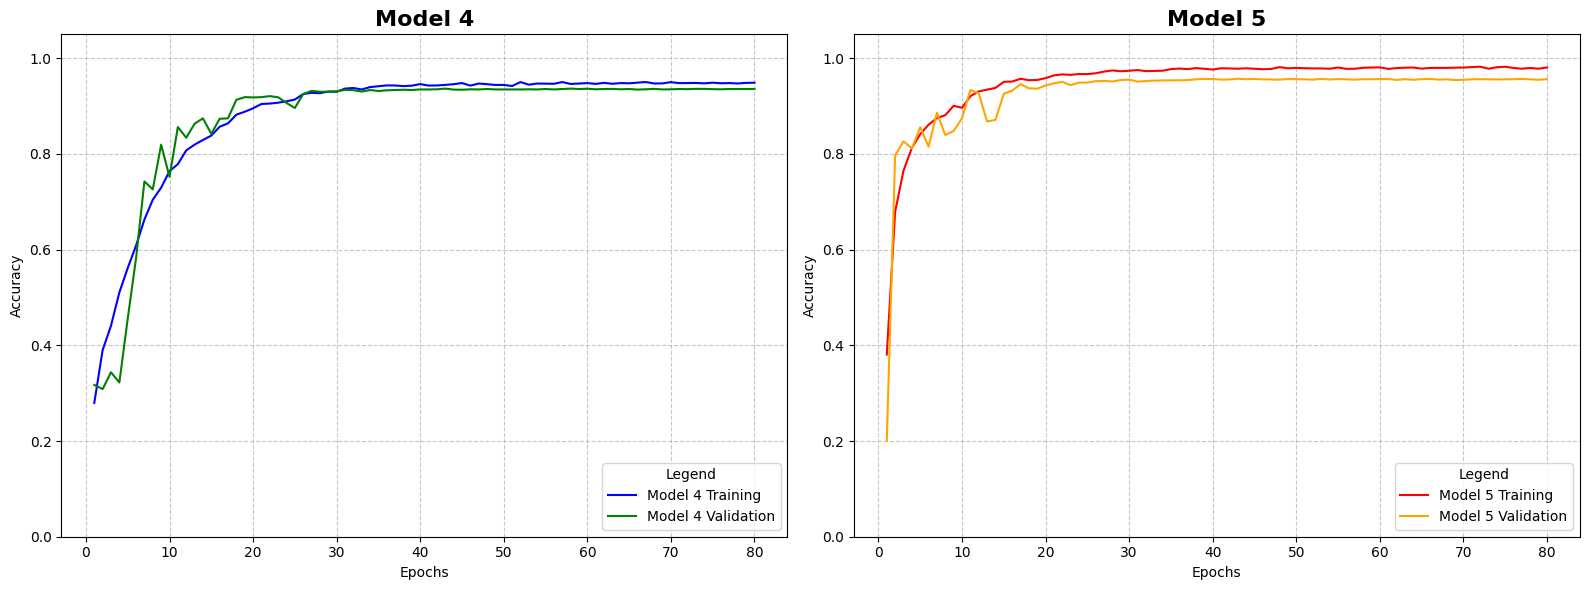

In [89]:
# Extract accuracy history for both models
model_with_norm_acc = history_with_norm .history['accuracy']
model_with_norm_val_acc = history_with_norm .history['val_accuracy']
model_regularized_acc = history_regularized .history['accuracy']
model_regularized_val_acc= history_regularized .history['val_accuracy']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Set the background color of the entire plot to white
fig.patch.set_facecolor('white')

# Plot the accuracy and validation accuracy for the first model (subplot 1)
ax1.plot(range(1, len(model_with_norm_acc) + 1), model_with_norm_acc, label='Model 4 Training', color='blue')
ax1.plot(range(1, len(model_with_norm_val_acc) + 1), model_with_norm_val_acc, label='Model 4 Validation', color='green')

# Add a title for the first subplot
ax1.set_title('Model 4', fontsize=16, fontweight='bold', color='black')

# Set axis labels for the first subplot
ax1.set_xlabel('Epochs', color='black')
ax1.set_ylabel('Accuracy', color='black')

# Customize legend for the first subplot
legend1 = ax1.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')
for text in legend1.get_texts():
    text.set_color('black')

# Customize tick colors for the first subplot
ax1.tick_params(axis='both', colors='black')

# Set the background color of the first subplot area to white
ax1.set_facecolor('white')

# Add axis lines to the first subplot
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.set_ylim([0.0, 1.05])
# Plot the accuracy and validation accuracy for the second model (subplot 2)
ax2.plot(range(1, len(model_regularized_acc) + 1), model_regularized_acc, label=f'Model 5 Training', color='red')
ax2.plot(range(1, len(model_regularized_val_acc) + 1), model_regularized_val_acc, label=f'Model 5 Validation', color='orange')

# Add a title for the second subplot
ax2.set_title('Model 5', fontsize=16, fontweight='bold', color='black')

# Set axis labels for the second subplot
ax2.set_xlabel('Epochs', color='black')
ax2.set_ylabel('Accuracy', color='black')

# Customize legend for the second subplot
legend2 = ax2.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')
for text in legend2.get_texts():
    text.set_color('black')

# Customize tick colors for the second subplot
ax2.tick_params(axis='both', colors='black')

# Set the background color of the second subplot area to white
ax2.set_facecolor('white')

# Add axis lines to the second subplot
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.set_ylim([0.0, 1.05])
# Adjust the spacing between subplots
ax1.grid(True, linestyle='--', alpha=0.7)

# Add grid to the second subplot (ax2)
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

# **Model 6**

# **Increase regulaizers**

In [90]:
model_regularized_inc = Sequential()
model_regularized_inc.add(Rescaling(scale=1.0/255.0, input_shape=(32, 32, 1)))

model_regularized_inc.add(Conv2D(filters = 6, kernel_size = (5,5),strides=1, activation ='relu',padding='same', kernel_regularizer=l2(0.03)))
model_regularized_inc.add(AveragePooling2D(pool_size=(2, 2), strides=2))

model_regularized_inc.add(Conv2D(filters = 16, kernel_size = (5,5), activation ='relu',strides=1, padding='same', kernel_regularizer=l2(0.05)))
model_regularized_inc.add(BatchNormalization())
model_regularized_inc.add(AveragePooling2D(pool_size=(2,2), strides=2))

model_regularized_inc.add(Flatten())

model_regularized_inc.add(Dense(120, activation = "relu"))
model_regularized_inc.add(BatchNormalization())
model_regularized_inc.add(Dropout(0.5))
model_regularized_inc.add(Dense(84, activation = "relu"))
model_regularized_inc.add(Dense(28, activation = "softmax"))

In [91]:
model_regularized_inc.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_regularized_inc = model_regularized_inc.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction],epochs=80,batch_size=batch_size)

Epoch 1/80
420/420 [==============================] - 6s 10ms/step - loss: 2.4329 - accuracy: 0.3502 - val_loss: 2.9299 - val_accuracy: 0.2330 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 4s 9ms/step - loss: 1.2026 - accuracy: 0.6491 - val_loss: 2.0451 - val_accuracy: 0.4414 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 4s 9ms/step - loss: 0.9001 - accuracy: 0.7403 - val_loss: 3.5516 - val_accuracy: 0.3348 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 4s 9ms/step - loss: 0.7465 - accuracy: 0.7862 - val_loss: 1.2839 - val_accuracy: 0.5958 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 4s 9ms/step - loss: 0.6710 - accuracy: 0.8104 - val_loss: 1.7082 - val_accuracy: 0.6006 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 4s 9ms/step - loss: 0.6049 - accuracy: 0.8382 - val_loss: 0.5076 - val_accuracy: 0.8744 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 4s 9ms/step - l

# **Increase dropout**

In [92]:
model_dropout_inc = Sequential()
model_dropout_inc.add(Rescaling(scale=1.0/255.0, input_shape=(32, 32, 1)))

model_dropout_inc.add(Conv2D(filters = 6, kernel_size = (5,5),strides=1, activation ='relu',padding='same', kernel_regularizer=l2(0.03)))
model_dropout_inc.add(AveragePooling2D(pool_size=(2, 2), strides=2))

model_dropout_inc.add(Conv2D(filters = 16, kernel_size = (5,5), activation ='relu',strides=1, padding='same', kernel_regularizer=l2(0.05)))
model_dropout_inc.add(BatchNormalization())
model_dropout_inc.add(AveragePooling2D(pool_size=(2,2), strides=2))

model_dropout_inc.add(Flatten())

model_dropout_inc.add(Dense(120, activation = "relu"))
model_dropout_inc.add(BatchNormalization())
model_dropout_inc.add(Dropout(0.6))
model_dropout_inc.add(Dense(84, activation = "relu"))
model_dropout_inc.add(Dense(28, activation = "softmax"))

In [93]:
model_dropout_inc.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_dropout_inc = model_dropout_inc.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction] ,epochs=80,batch_size=batch_size)

Epoch 1/80
420/420 [==============================] - 6s 10ms/step - loss: 2.6751 - accuracy: 0.2847 - val_loss: 3.1836 - val_accuracy: 0.1839 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 4s 9ms/step - loss: 1.4997 - accuracy: 0.5531 - val_loss: 0.9179 - val_accuracy: 0.7664 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 4s 9ms/step - loss: 1.0440 - accuracy: 0.6911 - val_loss: 0.7151 - val_accuracy: 0.8089 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 4s 9ms/step - loss: 0.8667 - accuracy: 0.7424 - val_loss: 0.8474 - val_accuracy: 0.7506 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 4s 9ms/step - loss: 0.7607 - accuracy: 0.7770 - val_loss: 0.6190 - val_accuracy: 0.8185 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 4s 9ms/step - loss: 0.6833 - accuracy: 0.8029 - val_loss: 0.4685 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 4s 9ms/step - l

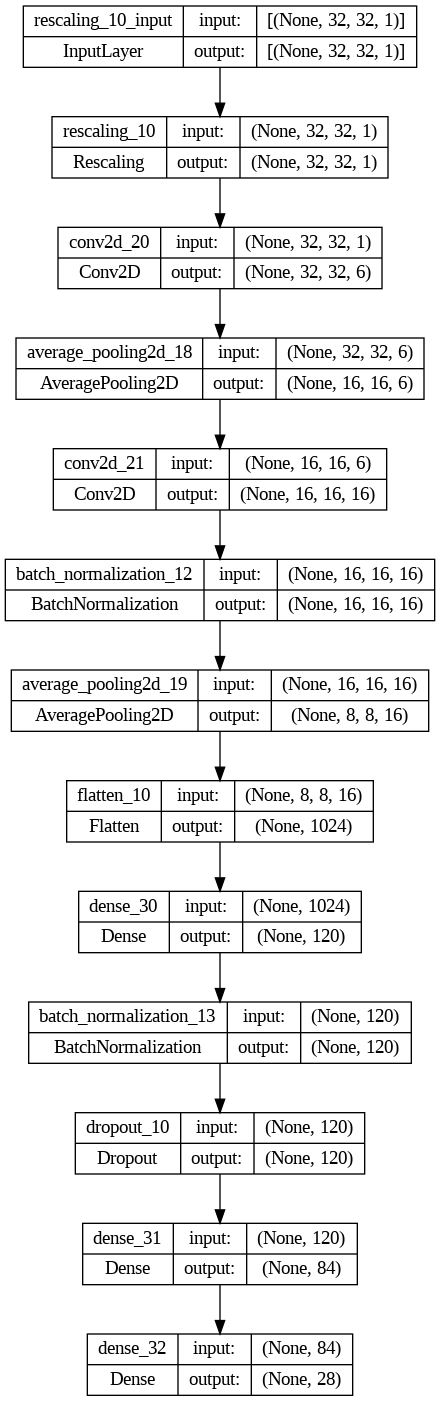

In [94]:
tf.keras.utils.plot_model(model_dropout_inc, to_file='model.png', show_shapes=True, show_layer_names=True)

In [95]:
import numpy as np

# Assuming 'history' is the object returned by model.fit()

# Extract the lists of accuracy values during training and validation
accuracy = history_dropout_inc.history['accuracy']  # Replace 'accuracy' with your metric name if different
val_accuracy = history_dropout_inc.history['val_accuracy']  # Replace 'val_accuracy' with your validation metric name if different

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(val_accuracy) + 1  # Adding 1 because epochs are usually 1-indexed

# Extract the best training and validation accuracy
best_training_accuracy = accuracy[best_epoch - 1]  # -1 to account for 0-indexing
best_validation_accuracy = val_accuracy[best_epoch - 1]  # You can extract validation accuracy in a similar way

print(f"Best Training Accuracy: {best_training_accuracy:.4f} at Epoch {best_epoch}")
print(f"Best Validation Accuracy: {best_validation_accuracy:.4f} at Epoch {best_epoch}")

Best Training Accuracy: 0.9656 at Epoch 74
Best Validation Accuracy: 0.9589 at Epoch 74


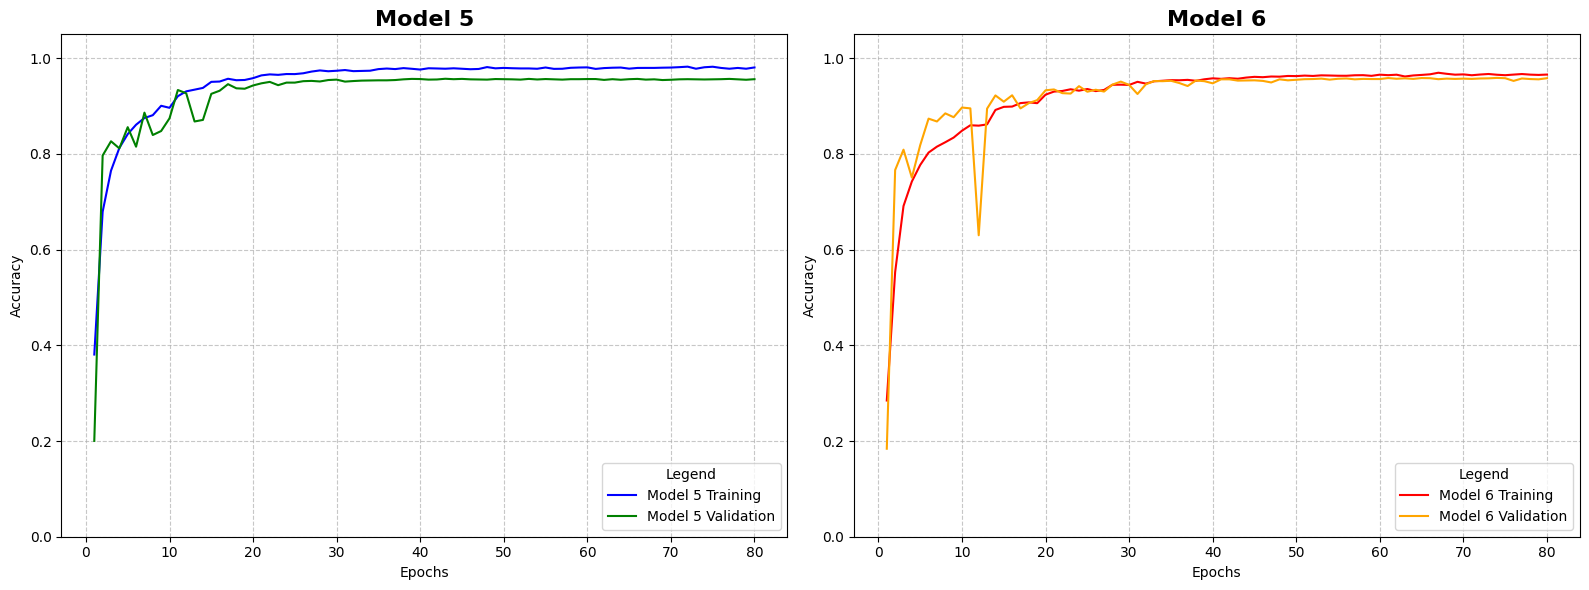

In [96]:
# Extract accuracy history for both models
model_regularized_acc = history_regularized .history['accuracy']
model_regularized_val_acc = history_regularized .history['val_accuracy']

model_dropout_inc_acc= history_dropout_inc.history['accuracy']
model_dropout_inc_val_acc = history_dropout_inc.history['val_accuracy']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Set the background color of the entire plot to white
fig.patch.set_facecolor('white')

# Plot the accuracy and validation accuracy for the first model (subplot 1)
ax1.plot(range(1, len(model_regularized_acc) + 1), model_regularized_acc, label='Model 5 Training', color='blue')
ax1.plot(range(1, len(model_regularized_val_acc) + 1), model_regularized_val_acc, label='Model 5 Validation', color='green')

# Add a title for the first subplot
ax1.set_title('Model 5', fontsize=16, fontweight='bold', color='black')

# Set axis labels for the first subplot
ax1.set_xlabel('Epochs', color='black')
ax1.set_ylabel('Accuracy', color='black')

# Customize legend for the first subplot
legend1 = ax1.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')
for text in legend1.get_texts():
    text.set_color('black')

# Customize tick colors for the first subplot
ax1.tick_params(axis='both', colors='black')

# Set the background color of the first subplot area to white
ax1.set_facecolor('white')

# Add axis lines to the first subplot
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.set_ylim([0.0, 1.05])
# Plot the accuracy and validation accuracy for the second model (subplot 2)
ax2.plot(range(1, len(model_dropout_inc_acc) + 1),model_dropout_inc_acc, label=f'Model 6 Training', color='red')
ax2.plot(range(1, len(model_dropout_inc_val_acc) + 1), model_dropout_inc_val_acc, label=f'Model 6 Validation', color='orange')

# Add a title for the second subplot
ax2.set_title('Model 6', fontsize=16, fontweight='bold', color='black')

# Set axis labels for the second subplot
ax2.set_xlabel('Epochs', color='black')
ax2.set_ylabel('Accuracy', color='black')

# Customize legend for the second subplot
legend2 = ax2.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')
for text in legend2.get_texts():
    text.set_color('black')

# Customize tick colors for the second subplot
ax2.tick_params(axis='both', colors='black')

# Set the background color of the second subplot area to white
ax2.set_facecolor('white')

# Add axis lines to the second subplot
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.set_ylim([0.0, 1.05])
# Adjust the spacing between subplots
ax1.grid(True, linestyle='--', alpha=0.7)

# Add grid to the second subplot (ax2)
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

# **Model 7**

# **Add new layers and additional neurons**

In [97]:
model_final = Sequential()
model_final.add(Rescaling(scale=1.0/255.0, input_shape=(32, 32, 1)))

model_final.add(Conv2D(filters = 6, kernel_size = (5,5),strides=1, activation ='relu',padding='same', kernel_regularizer=l2(0.03)))
model_final.add(AveragePooling2D(pool_size=(2, 2), strides=2))

model_final.add(Conv2D(filters = 16, kernel_size = (5,5), activation ='relu',strides=1, padding='same', kernel_regularizer=l2(0.05)))
model_final.add(BatchNormalization())
model_final.add(AveragePooling2D(pool_size=(2,2),strides=2))

model_final.add(Conv2D(filters = 16, kernel_size = (5,5), activation ='relu',strides=1, padding='same'))
model_final.add(BatchNormalization())
model_final.add(AveragePooling2D(pool_size=(2,2),strides=2))

model_final.add(Flatten())

model_final.add(Dense(120, activation = "relu"))
model_final.add(BatchNormalization())
model_final.add(Dropout(0.6))
model_final.add(Dense(84, activation = "relu"))
model_final.add(Dense(28, activation = "softmax"))

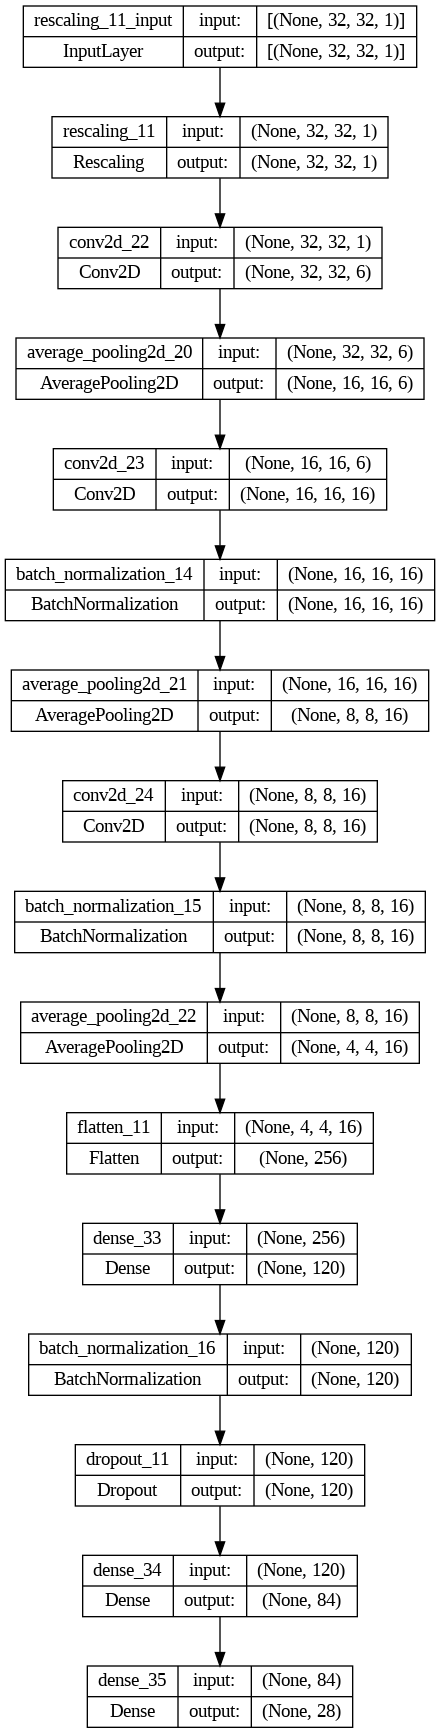

In [98]:
tf.keras.utils.plot_model(model_final, to_file='model.png', show_shapes=True, show_layer_names=True)

In [99]:
model_final.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_final= model_final.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction],epochs=80,batch_size=32)

Epoch 1/80
420/420 [==============================] - 7s 11ms/step - loss: 2.4679 - accuracy: 0.3318 - val_loss: 3.9674 - val_accuracy: 0.1232 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 4s 11ms/step - loss: 1.1901 - accuracy: 0.6371 - val_loss: 0.8536 - val_accuracy: 0.7551 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 5s 11ms/step - loss: 0.8458 - accuracy: 0.7510 - val_loss: 1.2042 - val_accuracy: 0.6607 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 4s 11ms/step - loss: 0.7055 - accuracy: 0.7941 - val_loss: 0.6851 - val_accuracy: 0.8024 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 4s 11ms/step - loss: 0.6350 - accuracy: 0.8219 - val_loss: 0.5492 - val_accuracy: 0.8527 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 4s 11ms/step - loss: 0.5634 - accuracy: 0.8412 - val_loss: 0.4324 - val_accuracy: 0.8896 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 4s 10ms/st

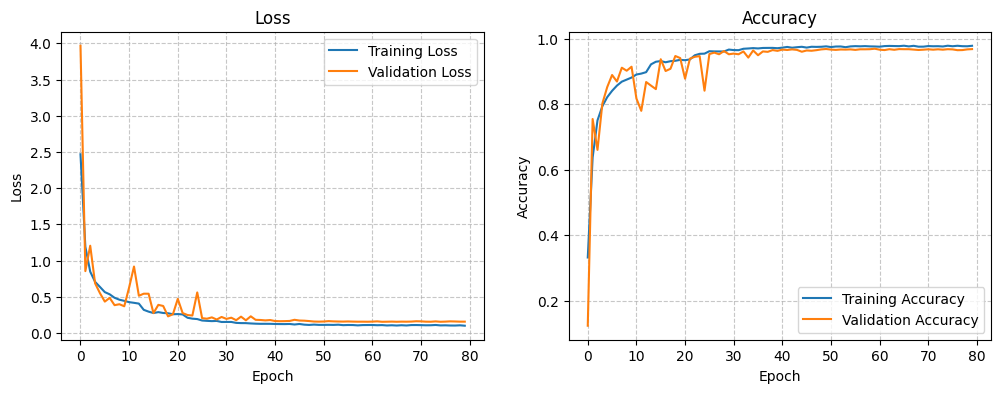

In [100]:
# Access loss and accuracy values
training_loss = history_final.history['loss']
training_accuracy = history_final.history['accuracy']
validation_loss = history_final.history['val_loss']
validation_accuracy = history_final.history['val_accuracy']

# Plot the loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Loss")

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [101]:
import numpy as np

# Assuming 'history' is the object returned by model.fit()

# Extract the lists of accuracy values during training and validation
accuracy = history_final.history['accuracy']  # Replace 'accuracy' with your metric name if different
val_accuracy = history_final.history['val_accuracy']  # Replace 'val_accuracy' with your validation metric name if different

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(val_accuracy) + 1  # Adding 1 because epochs are usually 1-indexed

# Extract the best training and validation accuracy
best_training_accuracy = accuracy[best_epoch - 1]  # -1 to account for 0-indexing
best_validation_accuracy = val_accuracy[best_epoch - 1]  # You can extract validation accuracy in a similar way

print(f"Best Training Accuracy: {best_training_accuracy:.4f} at Epoch {best_epoch}")
print(f"Best Validation Accuracy: {best_validation_accuracy:.4f} at Epoch {best_epoch}")

Best Training Accuracy: 0.9768 at Epoch 60
Best Validation Accuracy: 0.9699 at Epoch 60


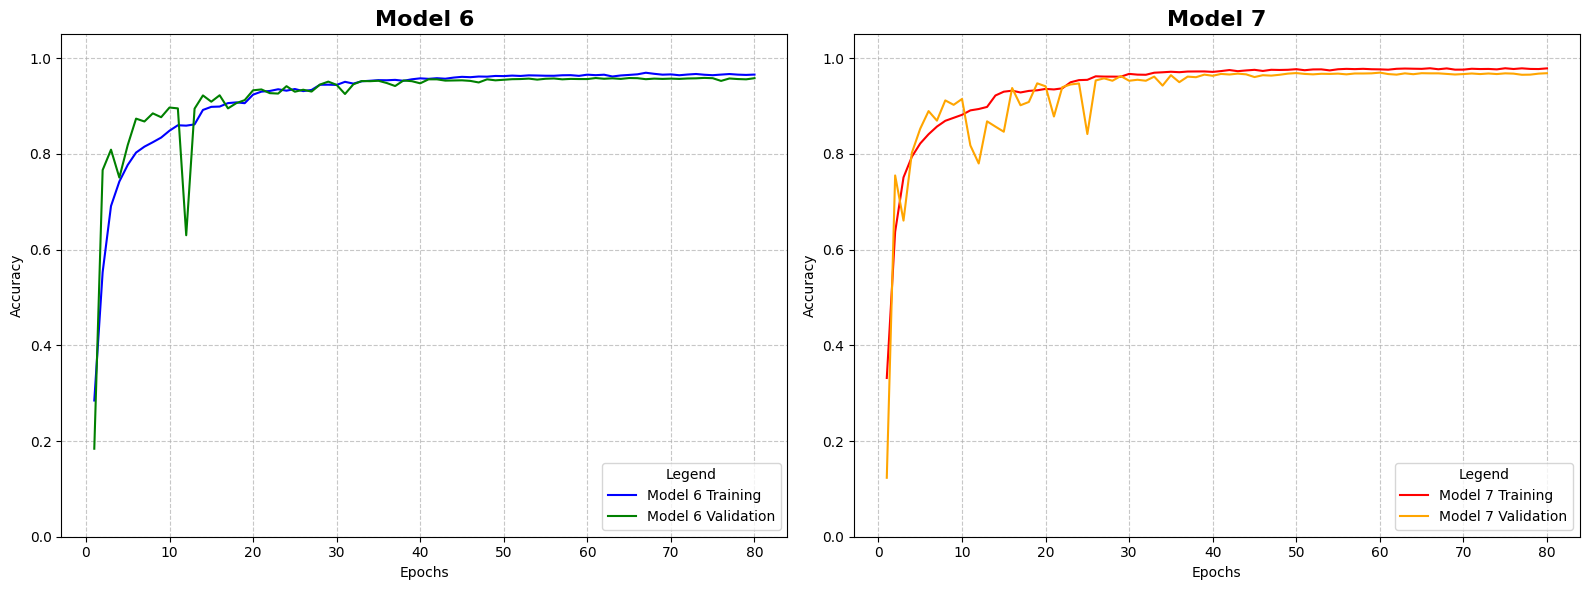

In [102]:
# Extract accuracy history for both models

model_dropout_inc_acc= history_dropout_inc.history['accuracy']
model_dropout_inc_val_acc = history_dropout_inc.history['val_accuracy']

model_final_acc = history_final.history['accuracy']
model_final_val_acc = history_final.history['val_accuracy']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Set the background color of the entire plot to white
fig.patch.set_facecolor('white')

# Plot the accuracy and validation accuracy for the first model (subplot 1)
ax1.plot(range(1, len(model_dropout_inc_acc) + 1), model_dropout_inc_acc, label='Model 6 Training', color='blue')
ax1.plot(range(1, len(model_dropout_inc_val_acc) + 1), model_dropout_inc_val_acc, label='Model 6 Validation', color='green')

# Add a title for the first subplot
ax1.set_title('Model 6', fontsize=16, fontweight='bold', color='black')

# Set axis labels for the first subplot
ax1.set_xlabel('Epochs', color='black')
ax1.set_ylabel('Accuracy', color='black')

# Customize legend for the first subplot
legend1 = ax1.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')
for text in legend1.get_texts():
    text.set_color('black')

# Customize tick colors for the first subplot
ax1.tick_params(axis='both', colors='black')

# Set the background color of the first subplot area to white
ax1.set_facecolor('white')

# Add axis lines to the first subplot
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.set_ylim([0.0, 1.05])
# Plot the accuracy and validation accuracy for the second model (subplot 2)
ax2.plot(range(1, len(model_final_acc) + 1), model_final_acc, label=f'Model 7 Training', color='red')
ax2.plot(range(1, len(model_final_val_acc) + 1), model_final_val_acc, label=f'Model 7 Validation', color='orange')

# Add a title for the second subplot
ax2.set_title('Model 7', fontsize=16, fontweight='bold', color='black')

# Set axis labels for the second subplot
ax2.set_xlabel('Epochs', color='black')
ax2.set_ylabel('Accuracy', color='black')

# Customize legend for the second subplot
legend2 = ax2.legend(loc='lower right', fontsize=10, title='Legend', facecolor='white')
for text in legend2.get_texts():
    text.set_color('black')

# Customize tick colors for the second subplot
ax2.tick_params(axis='both', colors='black')

# Set the background color of the second subplot area to white
ax2.set_facecolor('white')

# Add axis lines to the second subplot
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.set_ylim([0.0, 1.05])
# Adjust the spacing between subplots
ax1.grid(True, linestyle='--', alpha=0.7)

# Add grid to the second subplot (ax2)
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

# **Model 8**

# **optimal patience value**

Epoch 1/80
420/420 [==============================] - 7s 12ms/step - loss: 2.4703 - accuracy: 0.3396 - val_loss: 4.4696 - val_accuracy: 0.0917 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 5s 11ms/step - loss: 1.1879 - accuracy: 0.6483 - val_loss: 1.1671 - val_accuracy: 0.6277 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 5s 11ms/step - loss: 0.8925 - accuracy: 0.7443 - val_loss: 0.6709 - val_accuracy: 0.8128 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 5s 11ms/step - loss: 0.7417 - accuracy: 0.7891 - val_loss: 0.6147 - val_accuracy: 0.8366 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 5s 11ms/step - loss: 0.6623 - accuracy: 0.8116 - val_loss: 0.7261 - val_accuracy: 0.7658 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 4s 11ms/step - loss: 0.5859 - accuracy: 0.8373 - val_loss: 1.1918 - val_accuracy: 0.6744 - lr: 0.0010
Epoch 7/80
416/420 [============================>.] - ETA: 0s - 

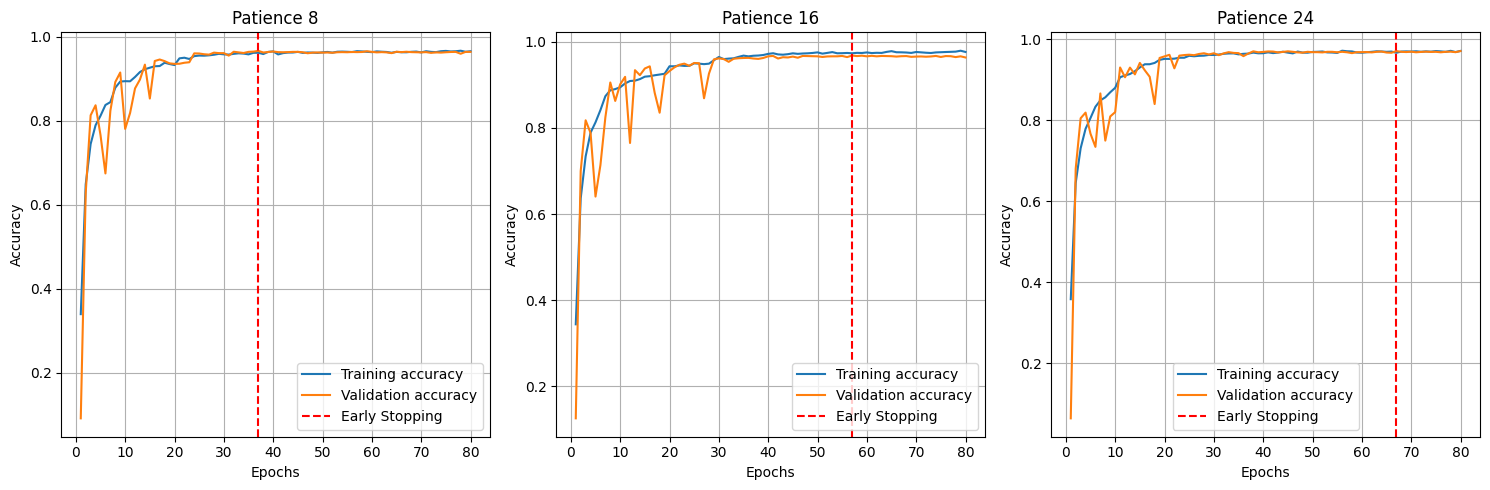

In [194]:
patience_values = [8, 16, 24]
early_stopping_epochs = []

# Create subplots
fig, axs = plt.subplots(1, len(patience_values), figsize=(15, 5))

# Lists to store accuracy histories
training_accuracies = []
validation_accuracies = []

# Iterate over patience values
for i, patience in enumerate(patience_values):
    # Clone the pre-defined model
    model = Sequential.from_config(model_final.get_config())

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model with early stopping
    history = model.fit(x_train, y_train, epochs=80, batch_size=32, validation_data=(x_test, y_test),callbacks=[learning_rate_reduction])

    # Store the validation accuracy history for this patience value
    training_accuracies.append((patience, history.history['accuracy']))
    validation_accuracies.append((patience, history.history['val_accuracy']))

    # Plot the training and validation accuracy
    training_accuracy_values = history.history['accuracy']
    validation_accuracy_values = history.history['val_accuracy']

    epochs = range(1, len(training_accuracy_values) + 1)
    axs[i].plot(epochs, training_accuracy_values, label='Training accuracy')
    axs[i].plot(epochs, validation_accuracy_values, label='Validation accuracy')

    # Find the best epoch
    best_epoch = np.argmax(validation_accuracy_values) + 1

    # Add a vertical line at the epoch where early stopping would have occurred
    axs[i].axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping')

    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Accuracy')
    axs[i].set_title(f'Patience {patience}')
    axs[i].legend()
    axs[i].grid(True)

    # Store the best epoch for later reference
    early_stopping_epochs.append(best_epoch)

plt.tight_layout()
plt.show()

In [207]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=8)

In [208]:
model_final2 = Sequential.from_config(model_final.get_config())

In [209]:
model_final2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_final2= model_final2.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[es,learning_rate_reduction],epochs=80,batch_size=32)

Epoch 1/80
420/420 [==============================] - 7s 12ms/step - loss: 2.4965 - accuracy: 0.3232 - val_loss: 4.4031 - val_accuracy: 0.0905 - lr: 0.0010
Epoch 2/80
420/420 [==============================] - 4s 11ms/step - loss: 1.1834 - accuracy: 0.6481 - val_loss: 0.8768 - val_accuracy: 0.7482 - lr: 0.0010
Epoch 3/80
420/420 [==============================] - 5s 11ms/step - loss: 0.8520 - accuracy: 0.7544 - val_loss: 0.6090 - val_accuracy: 0.8315 - lr: 0.0010
Epoch 4/80
420/420 [==============================] - 5s 11ms/step - loss: 0.6957 - accuracy: 0.8049 - val_loss: 0.8763 - val_accuracy: 0.7155 - lr: 0.0010
Epoch 5/80
420/420 [==============================] - 5s 11ms/step - loss: 0.6228 - accuracy: 0.8272 - val_loss: 0.6987 - val_accuracy: 0.8077 - lr: 0.0010
Epoch 6/80
420/420 [==============================] - 4s 10ms/step - loss: 0.5751 - accuracy: 0.8435 - val_loss: 0.4584 - val_accuracy: 0.8818 - lr: 0.0010
Epoch 7/80
420/420 [==============================] - 4s 10ms/st

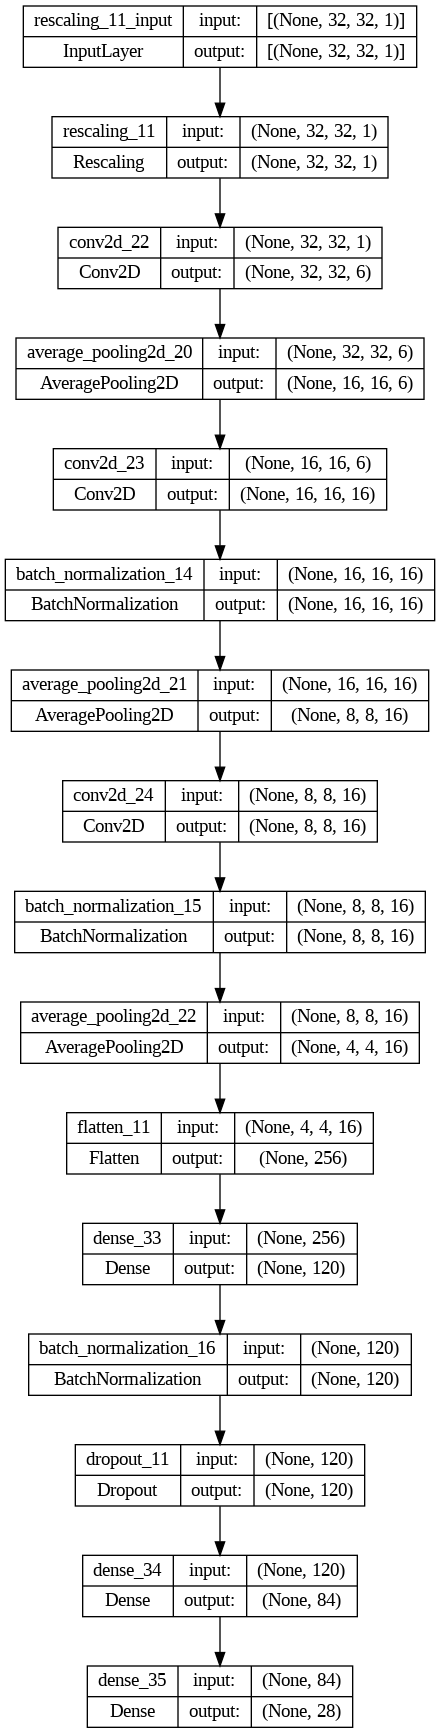

In [210]:
tf.keras.utils.plot_model(model_final2, to_file='model.png', show_shapes=True, show_layer_names=True)

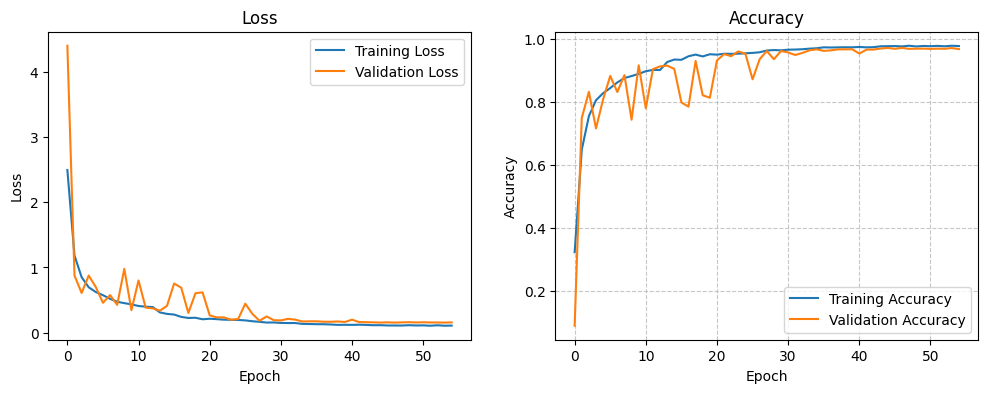

In [211]:
# Access loss and accuracy values
training_loss = history_final2.history['loss']
training_accuracy = history_final2.history['accuracy']
validation_loss = history_final2.history['val_loss']
validation_accuracy = history_final2.history['val_accuracy']

# Plot the loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss")

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [212]:
import numpy as np

# Assuming 'history' is the object returned by model.fit()

# Extract the lists of accuracy values during training and validation
accuracy = history_final2.history['accuracy']  # Replace 'accuracy' with your metric name if different
val_accuracy = history_final2.history['val_accuracy']  # Replace 'val_accuracy' with your validation metric name if different

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(val_accuracy) + 1  # Adding 1 because epochs are usually 1-indexed

# Extract the best training and validation accuracy
best_training_accuracy = accuracy[best_epoch - 1]  # -1 to account for 0-indexing
best_validation_accuracy = val_accuracy[best_epoch - 1]  # You can extract validation accuracy in a similar way

print(f"Best Training Accuracy: {best_training_accuracy:.4f} at Epoch {best_epoch}")
print(f"Best Validation Accuracy: {best_validation_accuracy:.4f} at Epoch {best_epoch}")

Best Training Accuracy: 0.9754 at Epoch 47
Best Validation Accuracy: 0.9708 at Epoch 47


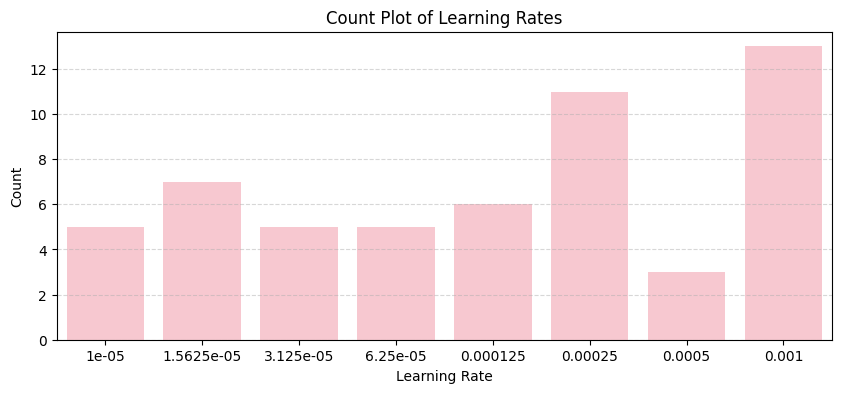

In [213]:
# Assuming 'Learning Rate' is a column in your DataFrame
learning_rates = history_final2.history['lr']

# Create a DataFrame
data = pd.DataFrame({'Learning Rate': learning_rates})

plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Learning Rate', color='pink')  # Set alpha for transparency


# Add labels and title
plt.xlabel('Learning Rate')
plt.ylabel('Count')
plt.title('Count Plot of Learning Rates')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

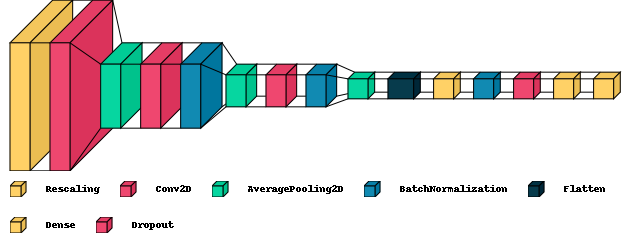

In [112]:
font = ImageFont.load_default()
image = visualkeras.layered_view(model_8, legend=True, font=font,draw_funnel=True,spacing=20)
image

# **Saving the architecture**

In [216]:
model_architecture_json = model_final2.to_json()

# **Label Encoding**

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
x_train2 = pd.read_csv("/content/drive/MyDrive/csvTrainImages 13440x1024.csv",header=None)
y_train2 = pd.read_csv("/content/drive/MyDrive/csvTrainLabel 13440x1.csv", header=None, names=["Labels"])
x_test2 = pd.read_csv("/content/drive/MyDrive/csvTestImages 3360x1024.csv",header=None,)
y_test2= pd.read_csv("/content/drive/MyDrive/csvTestLabel 3360x1.csv", header=None, names=["Labels"])

In [116]:
new_label=[]
for i,o in y_train2.iteritems():
   new_label.append(o.astype(int)-1)
   print((o).astype(int))

0         1
1         1
2         1
3         1
4         1
         ..
13435    28
13436    28
13437    28
13438    28
13439    28
Name: Labels, Length: 13440, dtype: int64


In [117]:
new_label = new_label[0]

In [118]:
np.shape(new_label)

(13440,)

In [119]:
y_train2['new_label']=new_label

In [120]:
new_label=[]
for i,o in y_test2.iteritems():
    new_label.append(o.astype(int)-1)

In [121]:
new_label = new_label[0]
y_test2['new_label']=new_label

In [122]:
Y_train = y_train2['new_label'].values
Y_test = y_test2['new_label'].values

In [123]:
 #Encode labels to one hot vectors (ex : ب -> [....,0,1,0,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [124]:
print(Y_train.shape, Y_test.shape)

(13440, 28) (3360, 28)


# **Confusion Matrix**

105/105 [==============================] - 1s 4ms/step


<Axes: title={'center': 'Confusion Matrix'}>

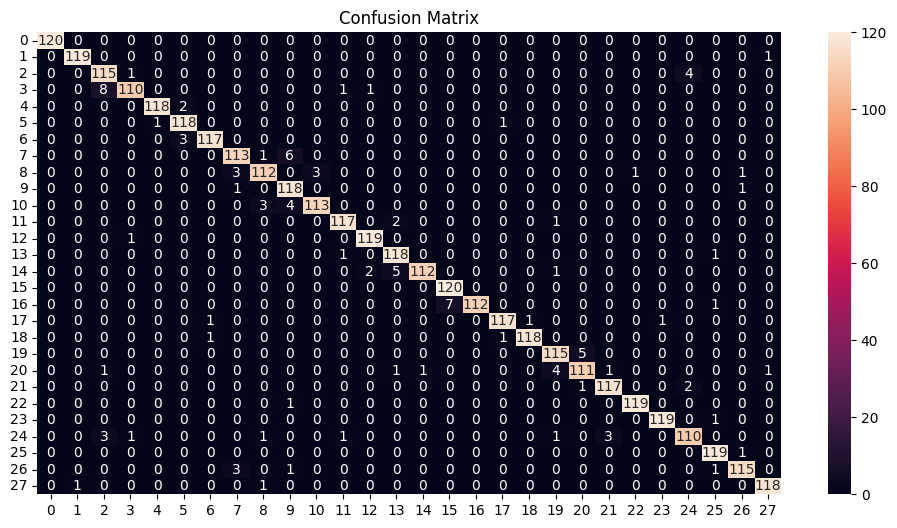

In [217]:
results = model_final2.predict(x_test)
pred = np.argmax(results, axis=1)
true = np.argmax(Y_test, axis=1)
cm = confusion_matrix(true, pred)

plt.figure(figsize=(12, 6))

# Add a title to the plot
plt.title("Confusion Matrix")

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")